# **Importing Data from SQL**

In [1]:
# install package tabulate
! pip install tabulate
! pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import MySQLdb
import getpass
from matplotlib.pyplot import figure
# Enter username and password of the DB
username = input('enter the username:')
password = getpass.getpass(prompt="enter password")
conn = MySQLdb.connect(host="localhost", user= username, passwd=password, db= 'I501Sp21grp1_db')
cursor = conn.cursor()

# Get the data from database and convert to dictionary
cursor.execute("select * from metadata")
rows = cursor.fetchall()
metadata_headers = [i[0] for i in cursor.description]
metadata_headers[0] = 'Sample_ID'
data_dict = {}

for row in rows:
    for i in range(len(row)):
        if not metadata_headers[i] in data_dict:
            data_dict[metadata_headers[i]] = [row[i]]
        else:
            data_dict[metadata_headers[i]].append(row[i])

# Convert dictionary to dataframe
import pandas as pd
metadata_df = pd.DataFrame.from_dict(data_dict)
metadata_df= metadata_df.set_index('Sample_ID')

enter the username:pshakkar
enter password········


In [3]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1121 entries, 10356_1#15 to 8727_5#89
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          1121 non-null   int64 
 1   Country       1121 non-null   object
 2   Continent     1121 non-null   object
 3   Azithromycin  1121 non-null   object
 4   NG_MAST       1121 non-null   object
 5   Group         1121 non-null   int64 
 6   azm_mic       1121 non-null   object
 7   log2_azm_mic  1121 non-null   object
 8   azm_sr        1121 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 87.6+ KB


In [4]:
# Rename log2_azm_mic to Log2(Azithromycin)
metadata_df = metadata_df.rename(columns={"log2_azm_mic":"Log2(Azithromycin)"})
# Convert column types
metadata_df['Azithromycin']=metadata_df['Azithromycin'].astype(float)
metadata_df['Log2(Azithromycin)']=metadata_df['Log2(Azithromycin)'].astype(float)
metadata_df['Year']=metadata_df['Year'].astype(int)

In [5]:
metadata_df.describe()

,Year,Azithromycin,Group,Log2(Azithromycin),azm_sr
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,2008.183764,1.748425,247.394291,-0.524671,0.109723
std,3.811887,8.115535,229.524135,1.652990,0.312684
min,1998.000000,0.030000,1.000000,-5.058894,0.000000
25%,2005.000000,0.250000,127.000000,-2.000000,0.000000
50%,2009.000000,0.500000,191.000000,-1.000000,0.000000
75%,2011.000000,1.000000,372.000000,0.000000,0.000000
max,2013.000000,256.000000,1004.000000,8.000000,1.000000


<AxesSubplot:>

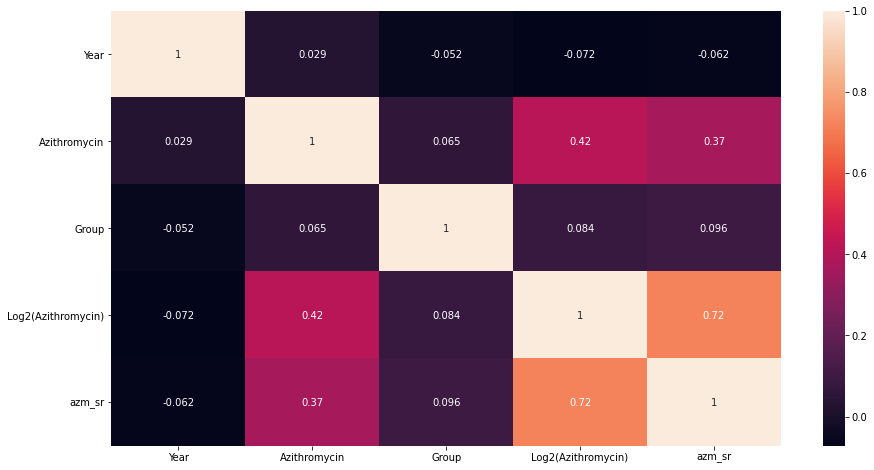

In [6]:
# Correlation Heat map
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(metadata_df.corr(method = 'pearson'),annot=True)

# **Data Cleaning and Enhancement**

In [7]:
# remove all N/A values
nan_value = float("NaN")
metadata_df['NG_MAST']=metadata_df['NG_MAST'].replace(to_replace="-", value = nan_value)

from tabulate import tabulate
metadata_df = metadata_df.dropna()

metadata_df=metadata_df.drop(["Country" , "Continent", "Group", "azm_mic", "NG_MAST"], axis=1)


metadata_headers = ['Sample_ID', 'Year', 'Azithromycin', 'Log2(Azithromycin)', 'azm_sr']

metadata_df = metadata_df.sort_values(by='Year')
print(tabulate(metadata_df, headers=metadata_headers, tablefmt='grid'))

+-------------+--------+----------------+----------------------+----------+
| Sample_ID   |   Year |   Azithromycin |   Log2(Azithromycin) |   azm_sr |
+=============+========+================+======================+==========+
| 10356_1#15  |   1998 |          0.125 |             -3       |        0 |
+-------------+--------+----------------+----------------------+----------+
| 10356_1#16  |   1998 |          0.094 |             -3.4112  |        0 |
+-------------+--------+----------------+----------------------+----------+
| 10356_1#17  |   1998 |          0.094 |             -3.4112  |        0 |
+-------------+--------+----------------+----------------------+----------+
| 10356_1#19  |   1998 |          0.064 |             -3.96578 |        0 |
+-------------+--------+----------------+----------------------+----------+
| 10356_1#20  |   1999 |          4     |              2       |        1 |
+-------------+--------+----------------+----------------------+----------+
| 17150_8#68

# **Descriptive statistics**

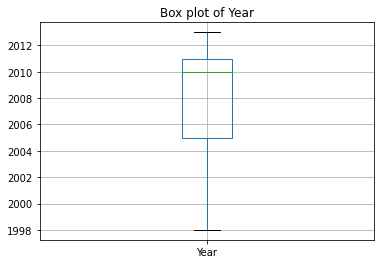

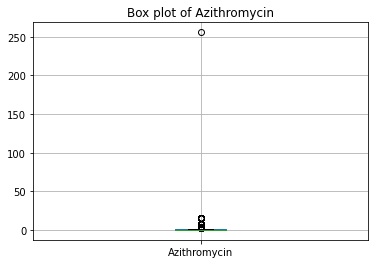

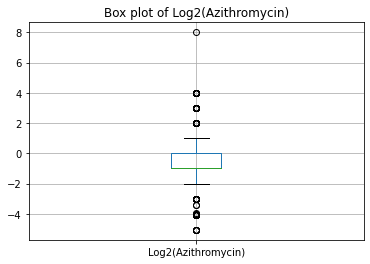

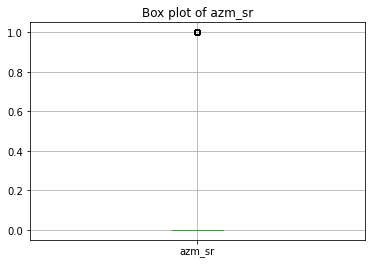

In [8]:

def boxplot_metadata(metadata_df):
    for col in list(metadata_df.columns):
        plt.show()
        metadata_df.boxplot(column=[col])
        title = 'Box plot of ' + col
        plt.title(title)

boxplot_metadata(metadata_df)

In [9]:
outlier_samples = list(metadata_df[metadata_df.Azithromycin > 200].index)
print(outlier_samples)

['15335_7#17']


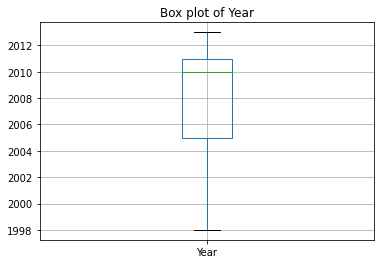

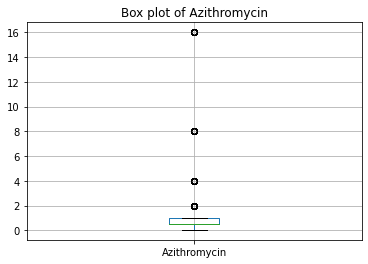

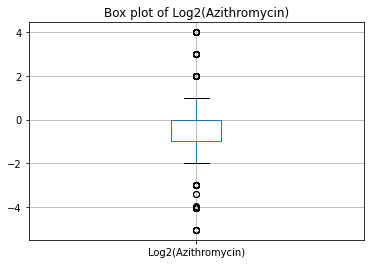

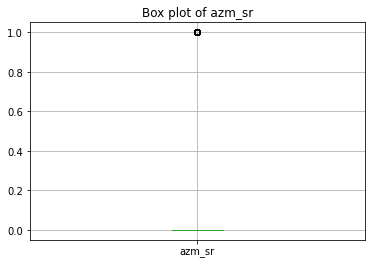

In [10]:
for outlier_sample in outlier_samples:
    metadata_df.drop(outlier_sample,inplace = True)

boxplot_metadata(metadata_df)

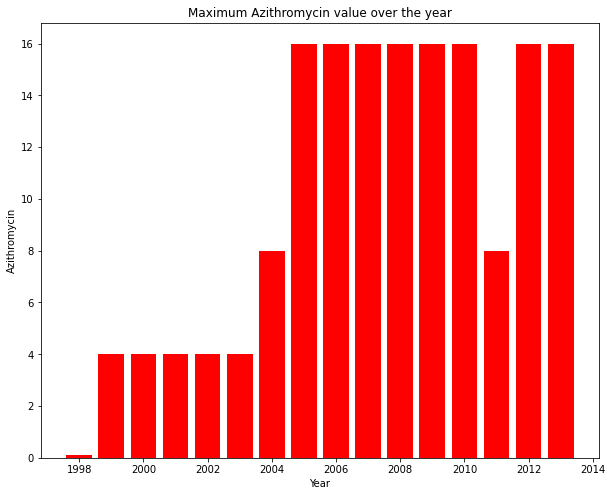

In [11]:
figure(figsize=(10, 8))
plt.bar(metadata_df.Year,metadata_df.Azithromycin,color = 'red')
plt.xlabel('Year')
plt.ylabel('Azithromycin')
plt.title('Maximum Azithromycin value over the year')
plt.show()

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Azithromycin'}>],
       [<AxesSubplot:title={'center':'Log2(Azithromycin)'}>,
        <AxesSubplot:title={'center':'azm_sr'}>]], dtype=object)

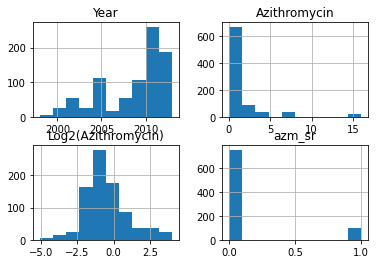

In [12]:
metadata_df.hist()

In [13]:
# Count of samples per Year per Azithromycin

metadata_year_azithromycin_count_df = metadata_df.copy()
metadata_year_azithromycin_count_df['year_azm_count'] = 1
metadata_year_azithromycin_count_df = metadata_year_azithromycin_count_df.groupby(['Year','Azithromycin'], as_index=False).sum()
metadata_year_azithromycin_count_df = metadata_year_azithromycin_count_df.drop(columns=['Log2(Azithromycin)', 'azm_sr'])
print(tabulate(metadata_year_azithromycin_count_df, headers = list(metadata_year_azithromycin_count_df.columns), tablefmt= 'grid'))

+----+--------+----------------+------------------+
|    |   Year |   Azithromycin |   year_azm_count |
+====+========+================+==================+
|  0 |   1998 |          0.064 |                1 |
+----+--------+----------------+------------------+
|  1 |   1998 |          0.094 |                2 |
+----+--------+----------------+------------------+
|  2 |   1998 |          0.125 |                1 |
+----+--------+----------------+------------------+
|  3 |   1999 |          4     |                1 |
+----+--------+----------------+------------------+
|  4 |   2000 |          0.25  |               10 |
+----+--------+----------------+------------------+
|  5 |   2000 |          0.5   |                3 |
+----+--------+----------------+------------------+
|  6 |   2000 |          1     |                5 |
+----+--------+----------------+------------------+
|  7 |   2000 |          2     |                7 |
+----+--------+----------------+------------------+
|  8 |   200

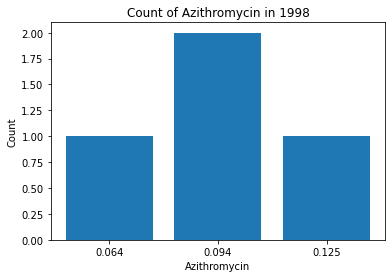

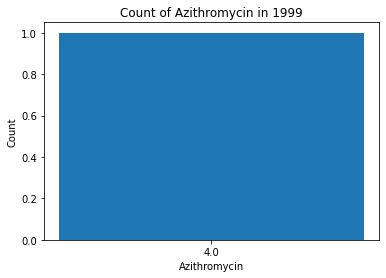

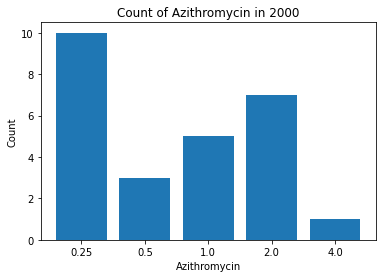

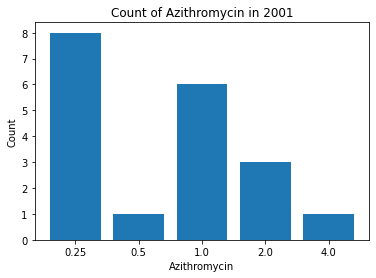

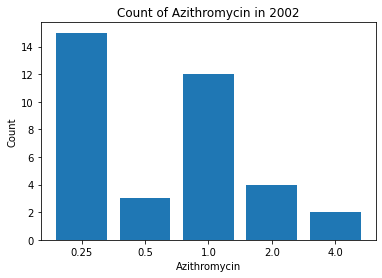

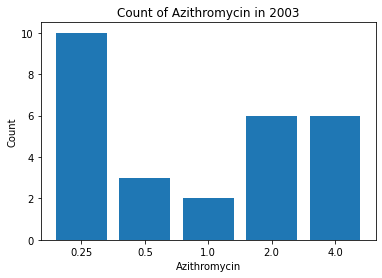

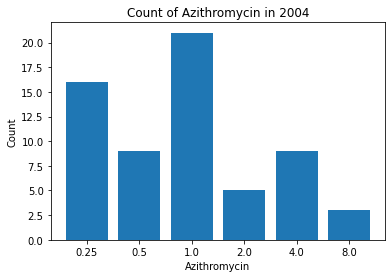

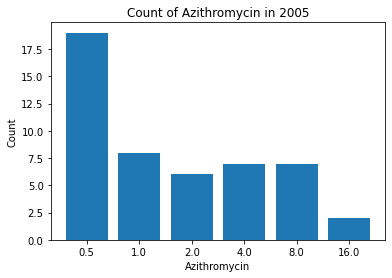

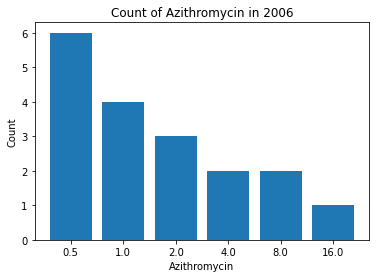

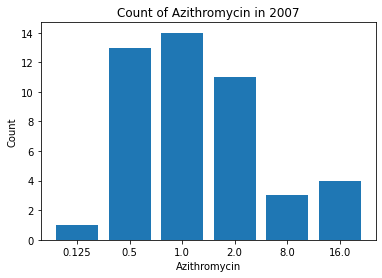

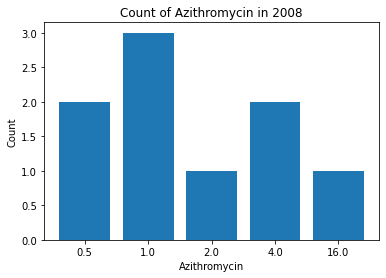

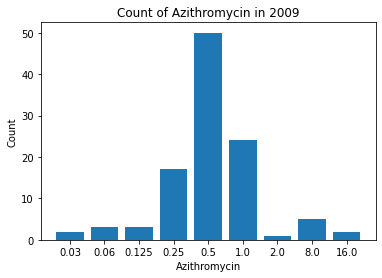

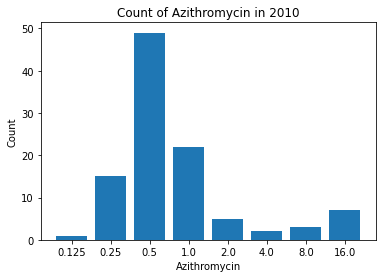

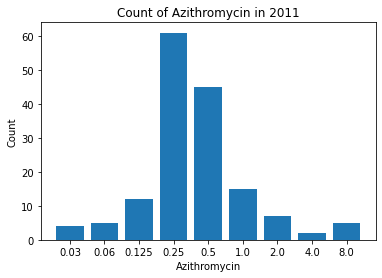

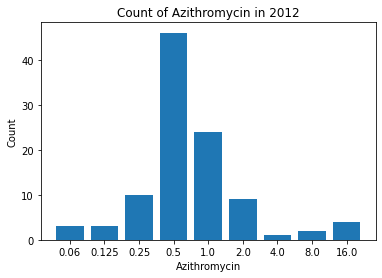

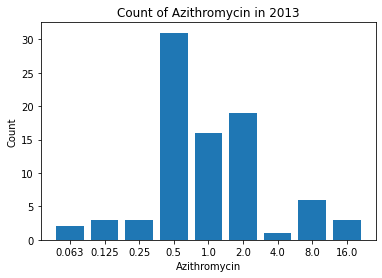

In [14]:
# Data representation of the above:

year_list = list(metadata_year_azithromycin_count_df.Year)
azithromycin_list = list(metadata_year_azithromycin_count_df.Azithromycin)
count_list = list(metadata_year_azithromycin_count_df.year_azm_count)
metadata_year_azm_count_dict = {}

for i in range(len(year_list)):
    if year_list[i] in metadata_year_azm_count_dict:
        metadata_year_azm_count_dict[year_list[i]][str(azithromycin_list[i])] = count_list[i]
    else:
        metadata_year_azm_count_dict[year_list[i]] = {str(azithromycin_list[i]) : count_list[i]}

for year in list(metadata_year_azm_count_dict.keys()):
    plt.bar(x=list(metadata_year_azm_count_dict[year].keys()), height=list(metadata_year_azm_count_dict[year].values()))
    plt.title('Count of Azithromycin in ' + str(year))
    plt.xlabel('Azithromycin')
    plt.ylabel('Count')
    plt.show()

+----+--------+----------+---------+-------------+----------+
|    |   Year |   azm_sr |   Count |   Tot_count |        % |
+====+========+==========+=========+=============+==========+
|  0 |   2000 |        0 |      25 |          26 | 96.1538  |
+----+--------+----------+---------+-------------+----------+
|  1 |   2000 |        1 |       1 |          26 |  3.84615 |
+----+--------+----------+---------+-------------+----------+
|  2 |   2001 |        0 |      18 |          19 | 94.7368  |
+----+--------+----------+---------+-------------+----------+
|  3 |   2001 |        1 |       1 |          19 |  5.26316 |
+----+--------+----------+---------+-------------+----------+
|  4 |   2002 |        0 |      34 |          36 | 94.4444  |
+----+--------+----------+---------+-------------+----------+
|  5 |   2002 |        1 |       2 |          36 |  5.55556 |
+----+--------+----------+---------+-------------+----------+
|  6 |   2003 |        0 |      21 |          27 | 77.7778  |
+----+--

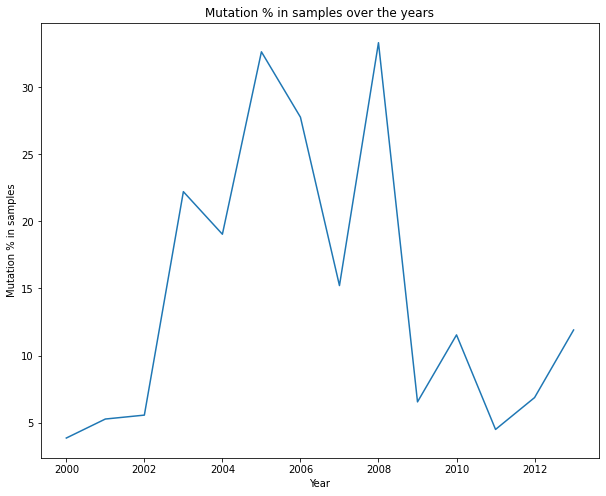

In [15]:
# Since the number of mutations per year depends on number of samples or number 
# of tests, the metric (no. of mutations per year) would be incorrect to predict 
# the trend. The better representation would be % of mutation

metadata_year_df = metadata_df.copy()
metadata_year_df['Tot_count'] = 1
metadata_year_df = metadata_year_df.groupby(['Year'], as_index=False).sum()
metadata_year_df = metadata_year_df.drop(columns=['Azithromycin', 'Log2(Azithromycin)', 'azm_sr'])
metadata_year_df = metadata_year_df[metadata_year_df['Tot_count']>5]

metadata_year_azm_df = metadata_df.copy()
metadata_year_azm_df['Count'] = 1
metadata_year_azm_df = metadata_year_azm_df.groupby(['Year','azm_sr'], as_index=False).sum()
metadata_year_azm_df = metadata_year_azm_df.drop(columns=['Azithromycin', 'Log2(Azithromycin)'])
metadata_year_azm_df = pd.merge(metadata_year_azm_df, metadata_year_df, on='Year')
metadata_year_azm_df['%'] = metadata_year_azm_df['Count']*100/metadata_year_azm_df['Tot_count']

print(tabulate(metadata_year_azm_df, headers=metadata_year_azm_df.columns, tablefmt='grid'))

metadata_year_azm_1_perc_dict = {}

for i in range(len(metadata_year_azm_df['Year'])):
    if (metadata_year_azm_df['azm_sr'][i] == 1):
        year = metadata_year_azm_df['Year'][i]
        metadata_year_azm_1_perc_dict[year] = metadata_year_azm_df['%'][i]

figure(figsize=(10, 8))
plt.plot(list(metadata_year_azm_1_perc_dict.keys()), list(metadata_year_azm_1_perc_dict.values()))
plt.xlabel("Year")
plt.ylabel("Mutation % in samples")
plt.title("Mutation % in samples over the years")
plt.show()

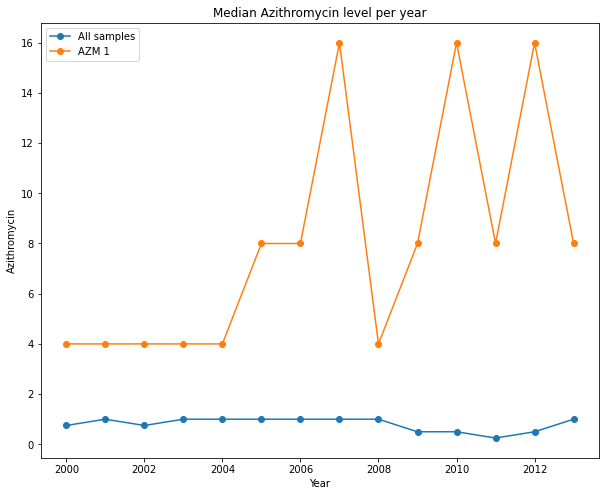

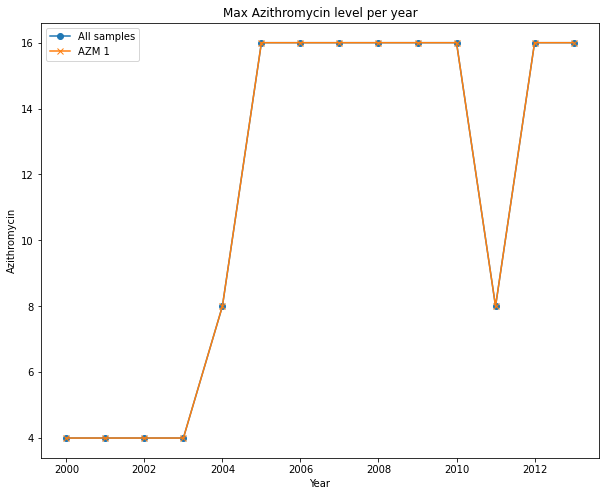

In [16]:
import statistics 

metadata_year_azmsr_dict = {}
metadata_year_azmsr_0_dict = {}
metadata_year_azmsr_1_dict = {}

for i in range(len(metadata_df['Year'])):
  year = metadata_df['Year'][i] 
  if (year <2000):
    continue
  if year in metadata_year_azmsr_dict:
    metadata_year_azmsr_dict[year].append(metadata_df['Azithromycin'][i])
  else:
    metadata_year_azmsr_dict[year] = [metadata_df['Azithromycin'][i]]
  if metadata_df['azm_sr'][i] == 0:
    if year in metadata_year_azmsr_0_dict:
      metadata_year_azmsr_0_dict[year].append(metadata_df['Azithromycin'][i])
    else:
      metadata_year_azmsr_0_dict[year] = [metadata_df['Azithromycin'][i]]
  else:
    if year in metadata_year_azmsr_1_dict:
      metadata_year_azmsr_1_dict[year].append(metadata_df['Azithromycin'][i])
    else:
      metadata_year_azmsr_1_dict[year] = [metadata_df['Azithromycin'][i]]

metadata_med_dict = {}
metadata_med_0_dict = {}
metadata_med_1_dict = {}

metadata_max_dict = {}
metadata_max_0_dict = {}
metadata_max_1_dict = {}

for year in metadata_year_azmsr_dict:
  metadata_med_dict[year] = statistics.median(map(float, metadata_year_azmsr_dict[year]))
  metadata_max_dict[year] = max(map(float, metadata_year_azmsr_dict[year]))

for year in metadata_year_azmsr_0_dict:
  metadata_med_0_dict[year] = statistics.median(map(float, metadata_year_azmsr_0_dict[year]))
  metadata_max_0_dict[year] = max(map(float, metadata_year_azmsr_0_dict[year]))

for year in metadata_year_azmsr_1_dict:
  metadata_med_1_dict[year] = statistics.median(map(float, metadata_year_azmsr_1_dict[year]))
  metadata_max_1_dict[year] = max(map(float, metadata_year_azmsr_1_dict[year]))

metadata_med_dict=dict(sorted(metadata_med_dict.items()))
metadata_med_0_dict=dict(sorted(metadata_med_0_dict.items()))
metadata_med_1_dict=dict(sorted(metadata_med_1_dict.items()))

figure(figsize=(10, 8))
plt.plot(list(metadata_med_dict.keys()), list(metadata_med_dict.values()), marker='o', label='All samples')
plt.plot(list(metadata_med_1_dict.keys()), list(metadata_med_1_dict.values()), marker='o', label='AZM 1')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Azithromycin')
plt.title('Median Azithromycin level per year')
plt.show()

figure(figsize=(10, 8))
plt.plot(list(metadata_max_dict.keys()), list(metadata_max_dict.values()), marker='o', label='All samples')
plt.plot(list(metadata_max_1_dict.keys()), list(metadata_max_1_dict.values()), marker='x', label='AZM 1')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Azithromycin')
plt.title('Max Azithromycin level per year')
plt.show()

In [17]:
# Normality tests
from scipy import stats

# null hypothesis: columns of metadata.csv are normally distributed

for col in list(metadata_df.columns):
  stat, pval = stats.normaltest(metadata_df[col])
  if pval >= 0.05:
    print(pval,'The null hypothesis that the column \"%s\" of metadata.csv are normally distributed is ACCEPTED.' %(col))
  else:
    print(pval,'The null hypothesis that the column \"%s\" of metadata.csv are normally distributed is REJECTED.' %(col))

8.691346588785756e-20 The null hypothesis that the column "Year" of metadata.csv are normally distributed is REJECTED.
2.1351118801541815e-144 The null hypothesis that the column "Azithromycin" of metadata.csv are normally distributed is REJECTED.
1.9455024381717718e-13 The null hypothesis that the column "Log2(Azithromycin)" of metadata.csv are normally distributed is REJECTED.
5.252470889064531e-88 The null hypothesis that the column "azm_sr" of metadata.csv are normally distributed is REJECTED.


# **Predicting the trend of mutation % till 2025**

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def plot_linear_regression(reshaped_X, reshaped_y, x_label = None, y_label = None, title = None):
    lin_reg = LinearRegression()
    lin_reg.fit(reshaped_X, reshaped_y)

  # visualising the linear regression model
    
    plt.scatter(reshaped_X[:,:], reshaped_y, color='red')
    pred_vals = {}
    for i in range(2014, 2026):
        pred_vals[i] = lin_reg.predict([[i]])
    plt.scatter(list(pred_vals.keys()), list(pred_vals.values()), color='green', marker='*')
    plt.plot( reshaped_X, lin_reg.predict(reshaped_X),color='blue', marker='*')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

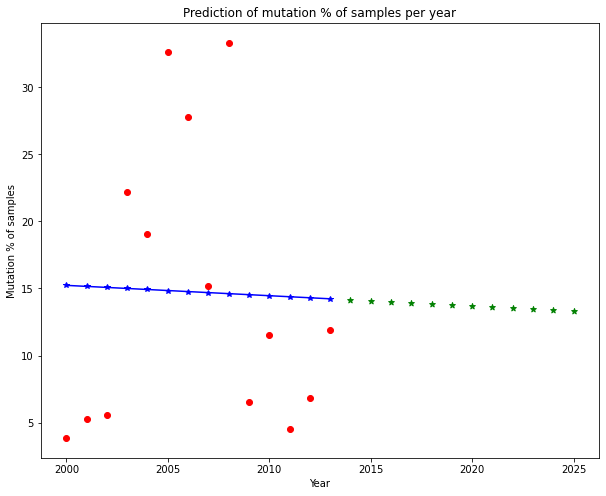

In [19]:
import numpy as np

X = np.array(list(metadata_year_azm_1_perc_dict.keys()))
y = np.array(list(metadata_year_azm_1_perc_dict.values()))
X = X.reshape(len(X),1)
y = y.reshape(len(y),1)
figure(figsize=(10, 8))
plot_linear_regression(X, y, "Year", "Mutation % of samples", "Prediction of mutation % of samples per year")

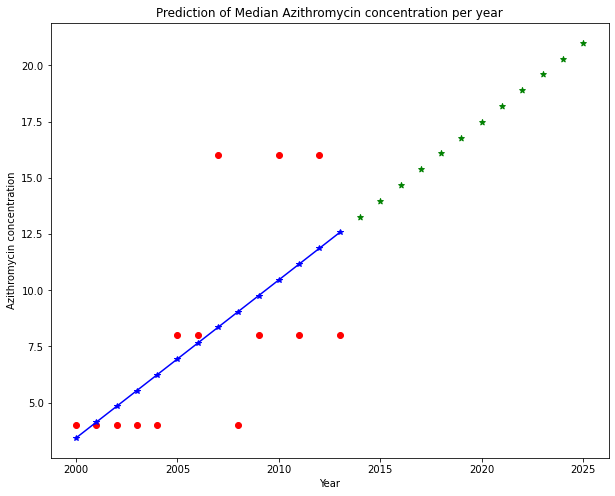

In [20]:
X = np.array(list(metadata_med_1_dict.keys()))
y = np.array(list(metadata_med_1_dict.values()))
X = X.reshape(len(X),1)
y = y.reshape(len(y),1)
figure(figsize=(10, 8))
plot_linear_regression(X, y, "Year", "Azithromycin concentration", "Prediction of Median Azithromycin concentration per year")

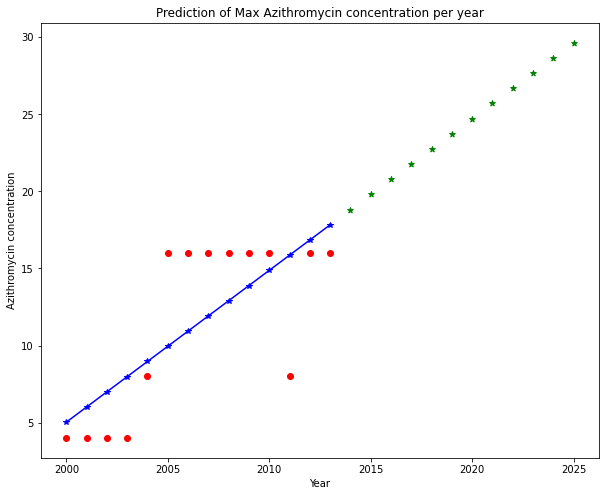

In [21]:
X = np.array(list(metadata_max_1_dict.keys()))
y = np.array(list(metadata_max_1_dict.values()))
X = X.reshape(len(X),1)
y = y.reshape(len(y),1)
figure(figsize=(10, 8))
plot_linear_regression(X, y, "Year", "Azithromycin concentration", "Prediction of Max Azithromycin concentration per year")

# **GWAS Data analysis**

In [22]:
gwas_data = pd.read_csv("gwas.csv")
gwas_data

,pattern_id,CTTAACATATTTGCCTTTGATTTTTGAAGAAGCTGCCACGCCGGCAG,TACCGTAACCGGCAATGCGGATATTACGGTC,CAGACGGCATTTTTTTTGCGTTTTTCGGGAGG,AACGGGTTTTCAGACGGCATTCGATATCGGGACG,CCAAAAATTACCCGCGTTGACGTAGCTAAAGA,CGGACCGGTATTCCGTCGAAATCACCGCCGTCAACCGCCCC,TGAAATTGTCCATCTCGTATGCCGTCTTCTGCTTG,"TACGGTATTGTCCGCATTATTAAACTCAAAACC,AGAAGACGGCATACGAGATGGACAATTTCATCC",GGCATTTTTTTTGCGTTTTTCGGGAGGGGGCGGC,...,ACCGATGAGTTCGCCGGAATCGGTACGATTGAC,CTGCTGGACAAAAAAGGGATTAAAGATATCACC,CGTTCCTTTCGGCGTATTCTCGCCGTTGCGCGGCG,TCACATTTCCGCTTCAGACGGCATCCGATATGA,GAAGCTGCCACGCCGGCAGAAGTGTTGTTTGCGGG,ACGCCGAAAGGAACGTGTATGCTGCCGCCCAACTGCG,ACTCGAATTTTGCAGGATTGGTATCAATGGCGATAATGCGACCGGCTTTGG,"ACCCGGCCCGGGCTGGCAGGCTACGGCTACACCGGTATCC,CACCTTAGGGAATCGTTCCCTTTGGGCCGGG,TACGCCGAAAGGAACGTGTATGCTGCCGCCC,GGGATTGTTGATTGTCGGACTGTTGTGCAACCTC",AGCCTGATTCACCAATGGTTTGTTCATAACAA,TTTTGAGCAGAAAGCAGTCAAAAACAGGGGGATTTTGCCCTTTTGACAGGTTCGAGTGCCG
0,17150_8#77,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,17150_8#68,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,17150_8#69,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,17150_8#70,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,17150_8#71,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,SRR2736302,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1481,SRR2736303,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1482,SRR2736304,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1483,SRR2736305,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [23]:
metadata_df = metadata_df[metadata_df.index.isin(gwas_data.pattern_id)]
gwas_data = gwas_data[gwas_data.pattern_id.isin(metadata_df.index)]
print(metadata_df)
print(gwas_data)


            Year  Azithromycin  Log2(Azithromycin)  azm_sr
Sample_ID                                                 
17150_8#68  2000          1.00                 0.0       0
17176_1#72  2000          0.25                -2.0       0
17150_8#83  2000          2.00                 1.0       0
17176_1#70  2000          0.25                -2.0       0
17176_1#58  2000          0.25                -2.0       0
...          ...           ...                 ...     ...
17176_1#16  2013          0.25                -2.0       0
15335_7#53  2013          2.00                 1.0       0
16043_2#18  2013          0.50                -1.0       0
15335_7#41  2013          8.00                 3.0       1
17176_1#4   2013          0.25                -2.0       0

[845 rows x 4 columns]
      pattern_id  CTTAACATATTTGCCTTTGATTTTTGAAGAAGCTGCCACGCCGGCAG  \
0     17150_8#77                                                0   
1     17150_8#68                                                0   
5 

In [24]:
meta_gwas_data = gwas_data.copy()
meta_gwas_data = meta_gwas_data.rename(columns={'pattern_id':'Sample_ID'})
meta_gwas_data = pd.merge(metadata_df, meta_gwas_data, on='Sample_ID')
print(meta_gwas_data)

      Sample_ID  Year  Azithromycin  Log2(Azithromycin)  azm_sr  \
0    17150_8#68  2000          1.00                 0.0       0   
1    17176_1#72  2000          0.25                -2.0       0   
2    17150_8#83  2000          2.00                 1.0       0   
3    17176_1#70  2000          0.25                -2.0       0   
4    17176_1#58  2000          0.25                -2.0       0   
..          ...   ...           ...                 ...     ...   
840  17176_1#16  2013          0.25                -2.0       0   
841  15335_7#53  2013          2.00                 1.0       0   
842  16043_2#18  2013          0.50                -1.0       0   
843  15335_7#41  2013          8.00                 3.0       1   
844   17176_1#4  2013          0.25                -2.0       0   

     CTTAACATATTTGCCTTTGATTTTTGAAGAAGCTGCCACGCCGGCAG  \
0                                                  0   
1                                                  0   
2                          

In [25]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
import time

X = meta_gwas_data.reindex(columns=list(meta_gwas_data.columns)[5:])
y = meta_gwas_data.azm_sr

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model_result = {}

def fit_model(classifier, X_train, X_test, y_train, y_test):
  result = {}
  start = time.process_time()
  model = classifier.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  y_pred[y_pred<0.5] = 0
  y_pred[y_pred>=0.5] = 1
  
  result['time'] = time.process_time() - start
  result['accuracy'] = metrics.accuracy_score(y_test,y_pred)*100
  result['roc_auc_score'] = metrics.roc_auc_score(y_test, y_pred)
  result['model'] = model

  return result

sgdc_enet = SGDClassifier(loss="log", penalty="elasticnet", l1_ratio=0.1)
model_result['SGDClassifer - Elasticnet']  = fit_model(sgdc_enet, X_train, X_test, y_train, y_test)

lsvc = LinearSVC(max_iter=7000)
model_result['LinearSVC'] = fit_model(lsvc, X_train, X_test, y_train, y_test)

dec_tree_gini = tree.DecisionTreeClassifier(criterion='gini')
model_result['DT - Gini'] = fit_model(dec_tree_gini, X_train, X_test, y_train, y_test)

dec_tree_entropy = tree.DecisionTreeClassifier(criterion='entropy')
model_result['DT - Entropy'] = fit_model(dec_tree_entropy, X_train, X_test, y_train, y_test)

abc = AdaBoostClassifier()
model_result['AdaBoostClassifier'] = fit_model(abc, X_train, X_test, y_train, y_test)

etc_gini = ExtraTreesClassifier(criterion='gini')
model_result['ExtraTreesClassifier - Gini'] = fit_model(etc_gini, X_train, X_test, y_train, y_test)

etc_entropy = ExtraTreesClassifier(criterion='entropy')
model_result['ExtraTreesClassifier - Entropy'] = fit_model(etc_gini, X_train, X_test, y_train, y_test)

gbc = GradientBoostingClassifier()
model_result['GradientBoostingClassifier'] = fit_model(gbc, X_train, X_test, y_train, y_test)

rfc_gini = RandomForestClassifier(criterion='gini')
model_result['RandomForestClassifier - Gini'] = fit_model(rfc_gini, X_train, X_test, y_train, y_test)

rfc_gini = RandomForestClassifier(criterion='entropy')
model_result['RandomForestClassifier - Entropy'] = fit_model(rfc_gini, X_train, X_test, y_train, y_test)

ml_model_df = pd.DataFrame.from_dict(model_result)
ml_model_df = ml_model_df.drop(index='model')
print(tabulate(ml_model_df, headers = ml_model_df.columns, tablefmt='grid'))

+---------------+-----------------------------+-------------+-------------+----------------+----------------------+-------------------------------+----------------------------------+------------------------------+---------------------------------+------------------------------------+
|               |   SGDClassifer - Elasticnet |   LinearSVC |   DT - Gini |   DT - Entropy |   AdaBoostClassifier |   ExtraTreesClassifier - Gini |   ExtraTreesClassifier - Entropy |   GradientBoostingClassifier |   RandomForestClassifier - Gini |   RandomForestClassifier - Entropy |
+===============+=============================+=============+=============+================+======================+===============================+==================================+==============================+=================================+====================================+
| time          |                    0.26784  |    2.60095  |    0.319396 |       0.302349 |             1.82417  |                      0.272428

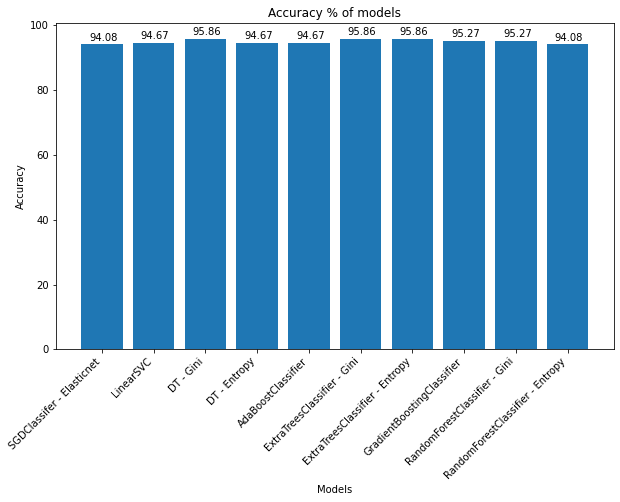

In [26]:
# Plot accuracy
from matplotlib.pyplot import figure

figure(figsize=(10, 6))
models = list(ml_model_df.columns)
accuracy = list(ml_model_df.T.accuracy)
ax = plt.bar(models, accuracy)
plt.xticks(rotation=45, ha="right")
for index, value in enumerate(accuracy):
    plt.text( index - 0.25, value + 1, str('%.2f' %(value)))
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy % of models')  
plt.show()



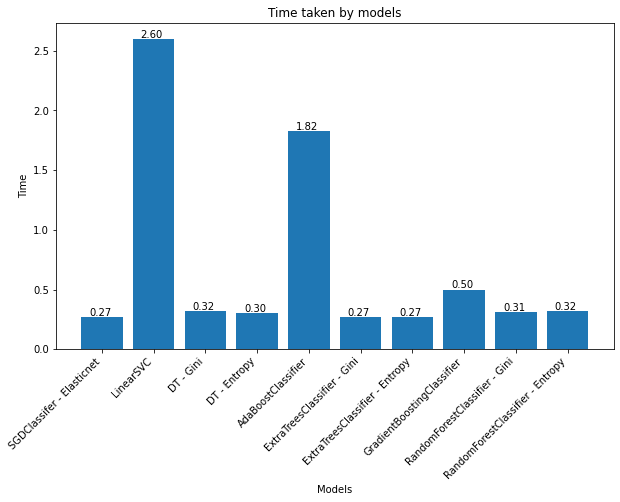

In [27]:
# plot time
figure(figsize=(10, 6))
model_time = list(ml_model_df.T.time)
ax = plt.bar(models, model_time)
plt.xticks(rotation=45, ha="right")
for index, value in enumerate(model_time):
    plt.text( index - 0.25, value + 0.01, str('%.2f' %(value)))
plt.xlabel('Models')
plt.ylabel('Time')
plt.title('Time taken by models') 
plt.show()

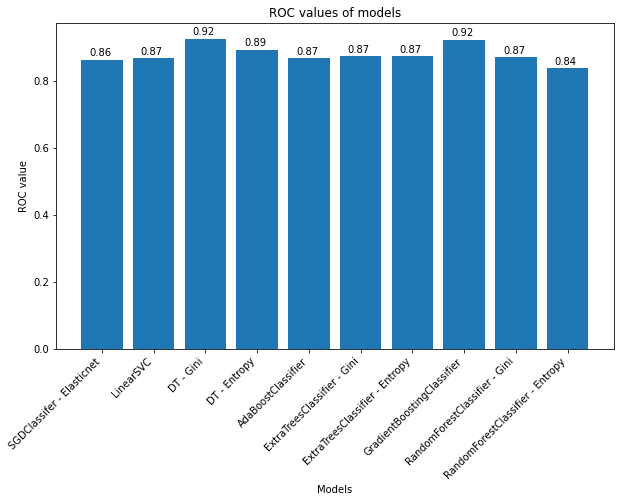

In [28]:
figure(figsize=(10, 6))
model_roc_auc_score = list(ml_model_df.T.roc_auc_score)
ax = plt.bar(models, model_roc_auc_score)
plt.xticks(rotation=45, ha="right")
for index, value in enumerate(model_roc_auc_score):
    plt.text( index - 0.25, value + 0.01, str('%.2f' %(value)))
plt.xlabel('Models')
plt.ylabel('ROC value')
plt.title('ROC values of models')
plt.show()

In [29]:
meta_gwas_data = gwas_data.copy()
meta_gwas_data = meta_gwas_data.rename(columns={'pattern_id':'Sample_ID'})
meta_gwas_data = pd.merge(metadata_df, meta_gwas_data, on='Sample_ID')
gwas_data_patterns = meta_gwas_data.copy()
gwas_data_patterns_columns = list(gwas_data.columns)
gwas_data_patterns_columns.insert(1,'Year')
gwas_data_patterns_columns.pop(0)
meta_gwas_data=meta_gwas_data.reindex(columns=gwas_data_patterns_columns)

yr_vs_resistance_df = meta_gwas_data.groupby(["Year"])[gwas_data_patterns_columns[1:]].sum().reset_index()
yr_vs_resistance_df['count'] = yr_vs_resistance_df['Year'].map(meta_gwas_data['Year'].value_counts())
yr_vs_resistance_df['Year'] = yr_vs_resistance_df['Year'].astype(int)
yr_vs_resistance_df['Year'] = yr_vs_resistance_df['Year'].astype(str)
yr_vs_resistance_df_cols = yr_vs_resistance_df.columns

yr_vs_resistance_perc_df = yr_vs_resistance_df.copy()
yr_vs_resistance_perc_df[yr_vs_resistance_df_cols[1:-1]] = yr_vs_resistance_df[yr_vs_resistance_df_cols[1:-1]]*100
yr_vs_resistance_perc_df[yr_vs_resistance_df_cols[1:-1]]=yr_vs_resistance_perc_df[yr_vs_resistance_df_cols[1:-1]].div(yr_vs_resistance_df['count'], axis=0)



def plot_resistance_perc_vs_year(features, classifier_name):
    figure(figsize=(10, 8))
    plot_df = yr_vs_resistance_perc_df.copy()
    plot_df=plot_df.reindex(columns=list(features))
    plt.plot(yr_vs_resistance_perc_df['Year'], plot_df, '-o')
    plt.xticks(np.arange(0, yr_vs_resistance_perc_df['Year'].count()), yr_vs_resistance_perc_df['Year'], rotation=60, ha='right')
    plt.legend(list(features), bbox_to_anchor=(1.05, 1))
    plt.xlabel('Year')
    plt.ylabel('Resistance %')
    plt.title('Resistance % per year - Top ten features of '+ classifier_name)
    plt.show()
    

def get_top_features_and_plot(classifier_name):
    coef = model_result[classifier_name]['model'].coef_.ravel()

    feature = X.columns

    top_positive_coefficients = np.argsort(coef)[-5:]
    top_negative_coefficients = np.argsort(coef)[:5]
    top_coef = np.hstack([top_negative_coefficients, top_positive_coefficients])

    figure(figsize=(10, 8))
    plt.title("Feature Importances %s - Azithromycin Resistance" %(classifier_name))
    colors = ['orange' if c < 0 else 'green' for c in coef[top_coef]]
    plt.bar(np.arange(10), coef[top_coef], color=colors)
    feature_names = np.array(feature)
    plt.xticks(np.arange(0, 10), feature_names[top_coef], rotation=60, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Coefficients')
    plt.show()
    return feature_names[top_coef]

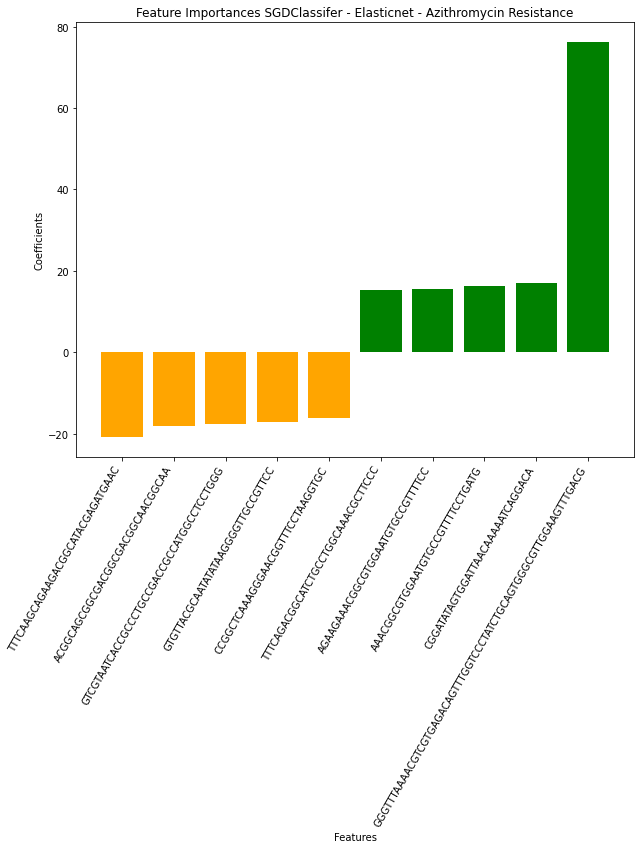

In [30]:
sgdc_enet_top10_features = get_top_features_and_plot('SGDClassifer - Elasticnet')

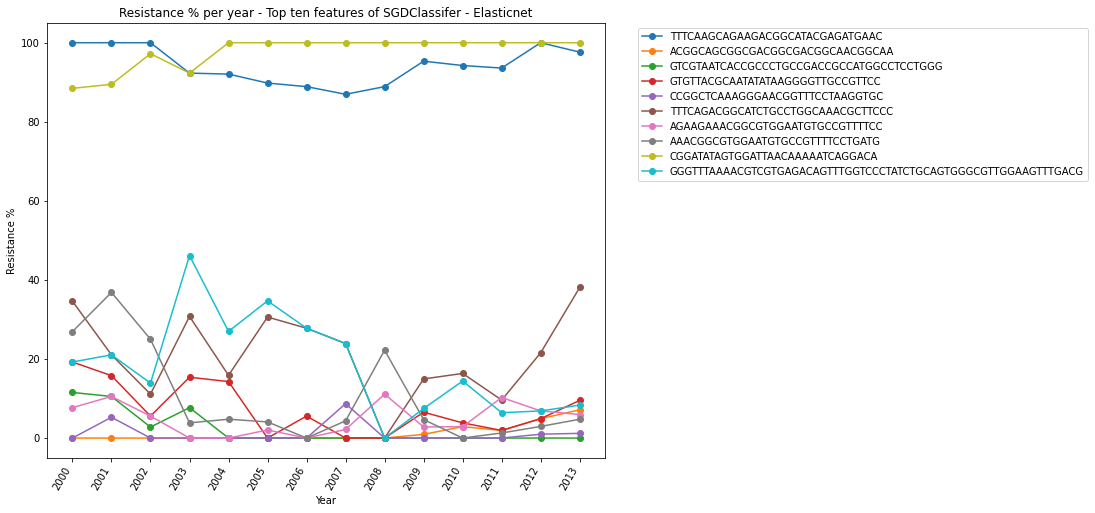

In [31]:
plot_resistance_perc_vs_year(sgdc_enet_top10_features, 'SGDClassifer - Elasticnet')

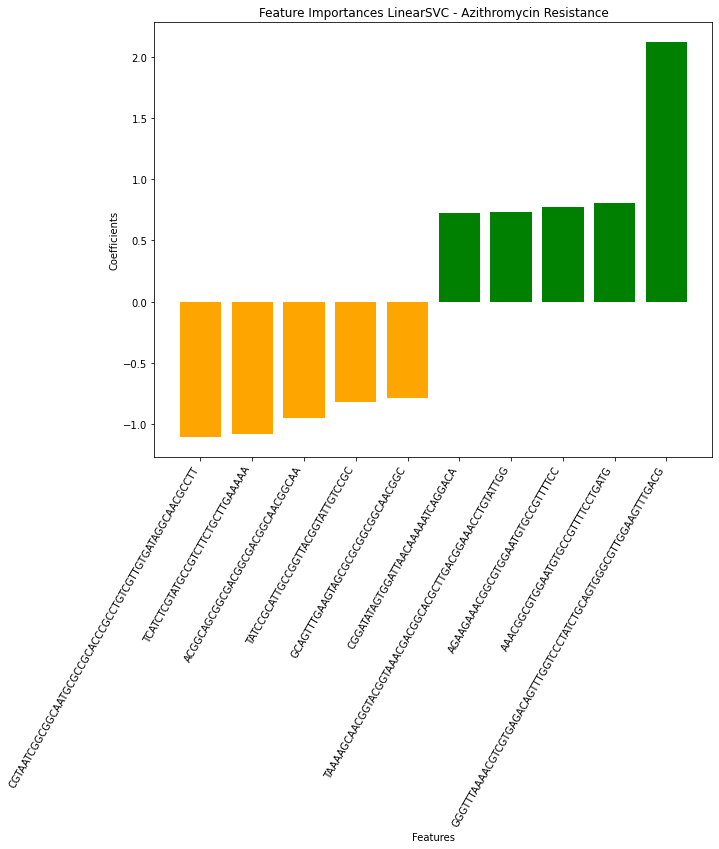

In [32]:
lsvc_top10_features = get_top_features_and_plot('LinearSVC')

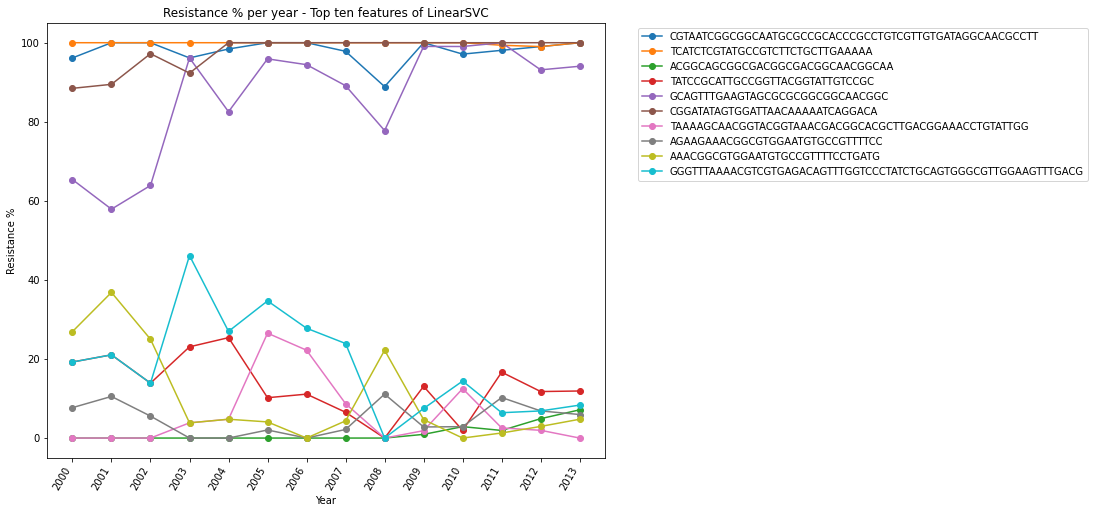

In [33]:
plot_resistance_perc_vs_year(lsvc_top10_features, 'LinearSVC')  

In [34]:
def get_important_features_and_plot(classifier_name):
    importances = model_result[classifier_name]['model'].feature_importances_
    indices = np.argsort(importances)[::-1][:10]
    feature = X.columns
    feature_names = np.array(feature)
    print("top_predictors: ", np.asarray(feature)[indices])
    figure(figsize=(8, 4))
    plt.bar(range(10), importances[indices])
    plt.xticks(range(10), np.asarray(feature_names)[indices], rotation=60, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Coefficients')
    plt.title("Feature Importances %s - Azithromycin Resistance" %(classifier_name))
    plt.show()
    return np.asarray(feature_names)[indices]

top_predictors:  ['GGGTTTAAAACGTCGTGAGACAGTTTGGTCCCTATCTGCAGTGGGCGTTGGAAGTTTGACG'
 'GTCGTAATCACCGCCCTGCCGACCGCCATGGCCTCCTGGG'
 'TTGCCGTTCCGCAGTTGGGCGGCAGCATACA' 'CCGGCTCAAAGGGAACGGTTTCCTAAGGTGC'
 'TTTCAAGCAGAAGACGGCATACGAGATGAAC' 'TCATCTCGTATGCCGTCTTCTGCTTGAAAAA'
 'ATAAAGATGAGATAACGGCTTTGATTAATAGTCTTAAATAAAGGGGC'
 'TGGGAATCCCGACTTTTTGTATTCCTGACTAACGCAATCCGACCAAAAAT'
 'TATCCGCATTGCCGGTTACGGTATTGTCCGC'
 'TAATGATTGGGCAAAATATTTTTCTACGTTATAAGCGCAAATCAATACGCTGACTAAAGG']


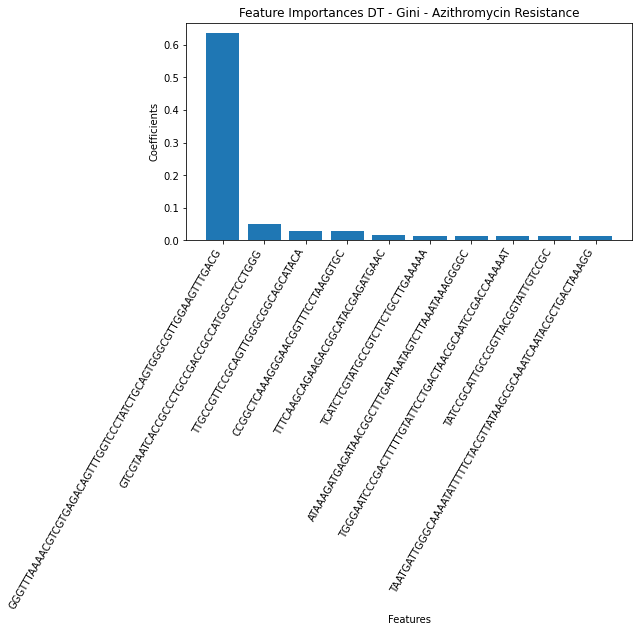

In [35]:
dec_tree_gini_important_features = get_important_features_and_plot('DT - Gini')

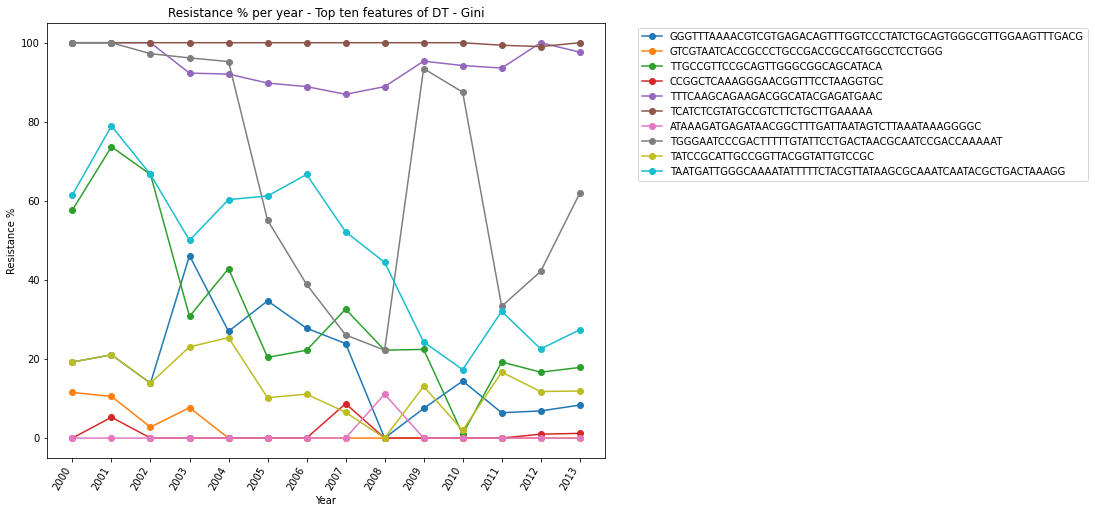

In [36]:
plot_resistance_perc_vs_year(dec_tree_gini_important_features,'DT - Gini')

top_predictors:  ['GGGTTTAAAACGTCGTGAGACAGTTTGGTCCCTATCTGCAGTGGGCGTTGGAAGTTTGACG'
 'GTCGTAATCACCGCCCTGCCGACCGCCATGGCCTCCTGGG'
 'TTGCCGTTCCGCAGTTGGGCGGCAGCATACA' 'TTTCAGACGGCATCTGCCTGGCAAACGCTTCCC'
 'TGGGAATCCCGACTTTTTGTATTCCTGACTAACGCAATCCGACCAAAAAT'
 'CCGGCTCAAAGGGAACGGTTTCCTAAGGTGC'
 'ATAAAGATGAGATAACGGCTTTGATTAATAGTCTTAAATAAAGGGGC'
 'ACCGTAACGAACCAAACAAAAACCAAGAAGTTCGCTTAAATA'
 'CGTAATCGGCGGCAATGCGCCGCACCCGCCTGTCGTTGTGATAGGCAACGCCTT'
 'TTTCAAGCAGAAGACGGCATACGAGATGAAC']


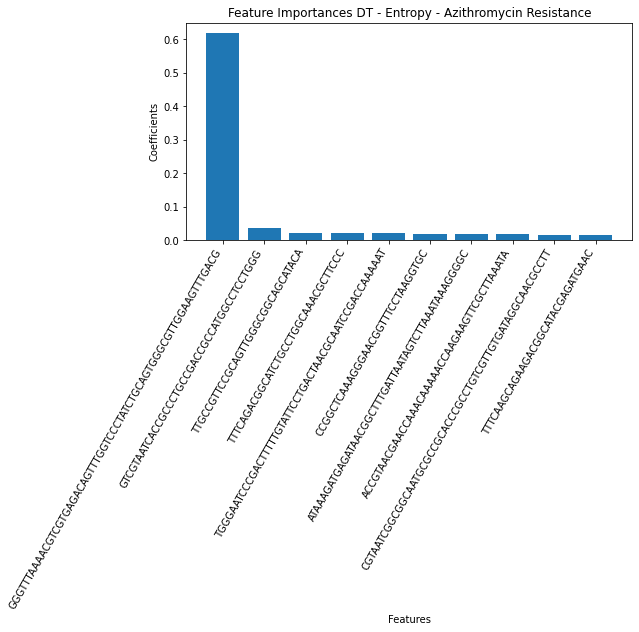

In [37]:
dec_tree_entropy_important_features = get_important_features_and_plot('DT - Entropy')

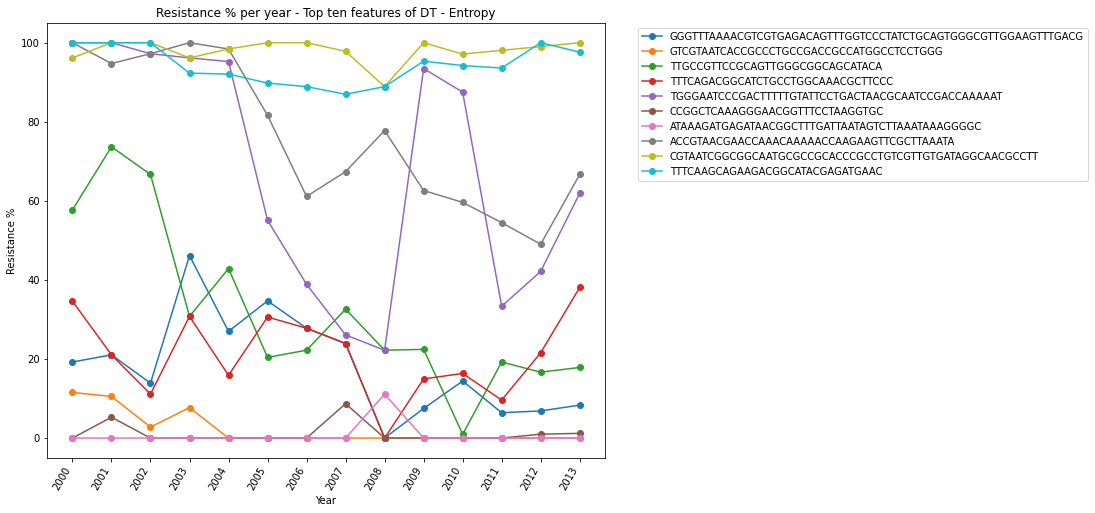

In [38]:
plot_resistance_perc_vs_year(dec_tree_entropy_important_features,'DT - Entropy')

top_predictors:  ['GGGTTTAAAACGTCGTGAGACAGTTTGGTCCCTATCTGCAGTGGGCGTTGGAAGTTTGACG'
 'TTTCAGACGGCATCTGCCTGGCAAACGCTTCCC'
 'ACAGATTACCTGCCGACTGCTGCTTCAGGCTGGACGGA'
 'CGTAATCGGCGGCAATGCGCCGCACCCGCCTGTCGTTGTGATAGGCAACGCCTT'
 'ACGGCAGCGGCGACGGCGACGGCAACGGCAA' 'ACCGTAACCGGCAATGCGGATATTACGGTCA'
 'ATGCGCGTCGCCTACGGACACGTCAGACACG' 'AAACGGCGTGGAATGTGCCGTTTTCCTGATG'
 'TAATCCTTATCATTCTTTAATTGAATCGGGCTTGTTATGAACAAACCATTGGTGAATCAGG'
 'CATCTGCCTGGCAAACGCTTCCCCGTCGCCCTCGAA']


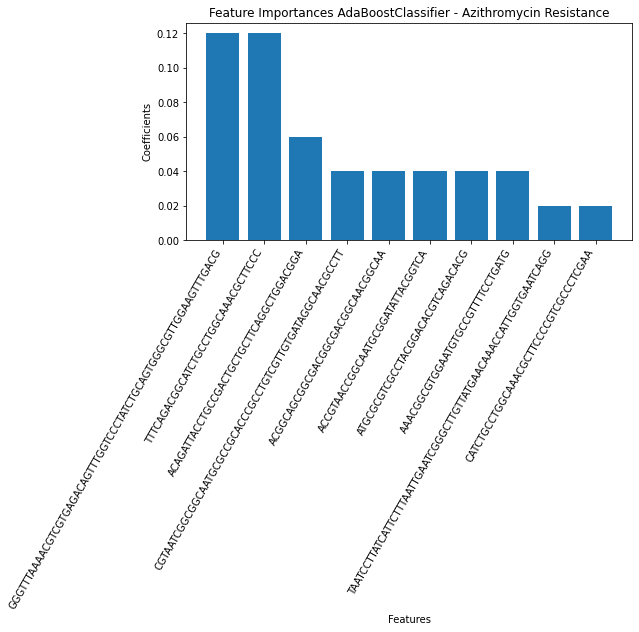

In [39]:
abc_important_features = get_important_features_and_plot('AdaBoostClassifier')

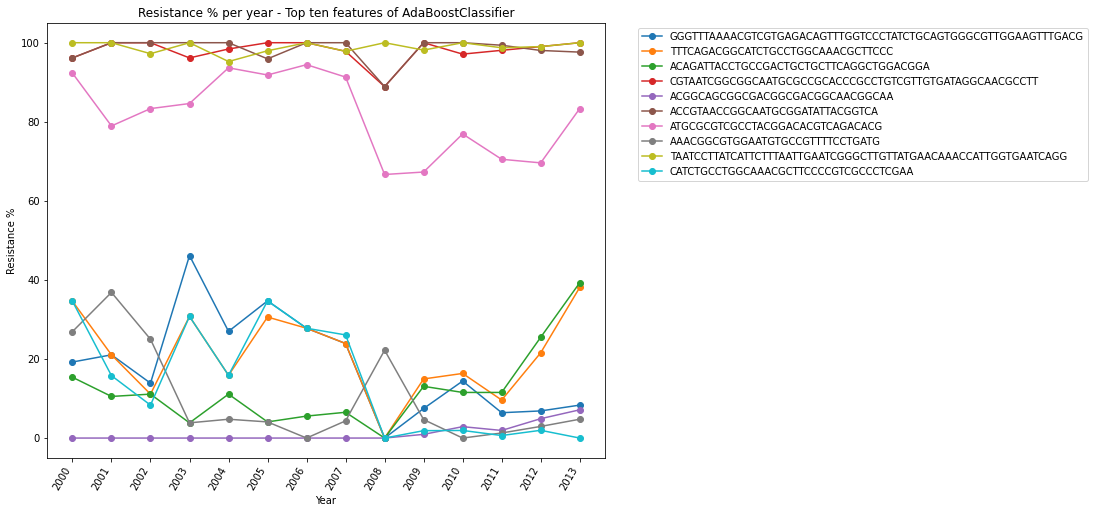

In [40]:
plot_resistance_perc_vs_year(abc_important_features, 'AdaBoostClassifier')

top_predictors:  ['GGGTTTAAAACGTCGTGAGACAGTTTGGTCCCTATCTGCAGTGGGCGTTGGAAGTTTGACG'
 'TTTCAGACGGCATCTGCCTGGCAAACGCTTCCC'
 'CATCTGCCTGGCAAACGCTTCCCCGTCGCCCTCGAA' 'CCGTTCCCTTTGGGCCGGGGCGGGGCAACGC'
 'CGGCATCCGATATGAACTCCTCGCAACGCAAA'
 'TGGGAATCCCGACTTTTTGTATTCCTGACTAACGCAATCCGACCAAAAAT'
 'ACCGTGTAGCCCTGCTGTTTGAACGCCAACCCGTTTTTGTGCGCCCAACGGCTCACAAGGT'
 'GGCGGGCAGCACATCGGAAATTTTGGCGCGGAATATCTGGAACGGCGC'
 'ACCGTAACGAACCAAACAAAAACCAAGAAGTTCGCTTAAATA'
 'ACTTGCAGTTTTTCAACAAACAAACTGGGGAT']


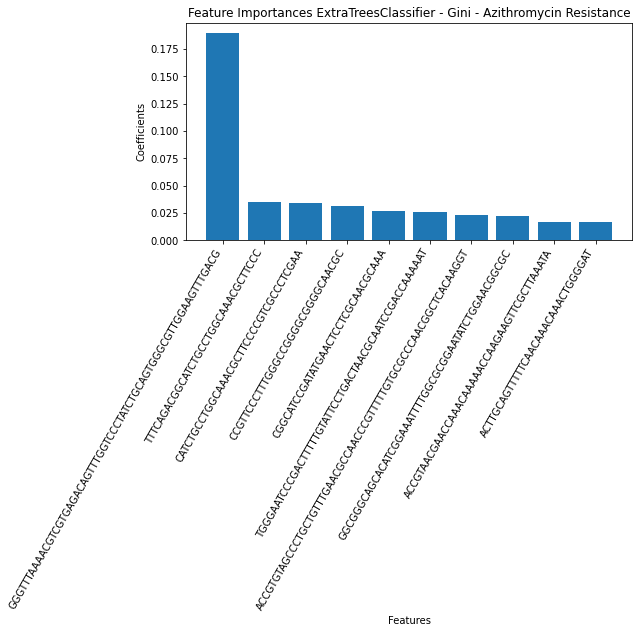

In [41]:
etc_gini_important_feature = get_important_features_and_plot('ExtraTreesClassifier - Gini')

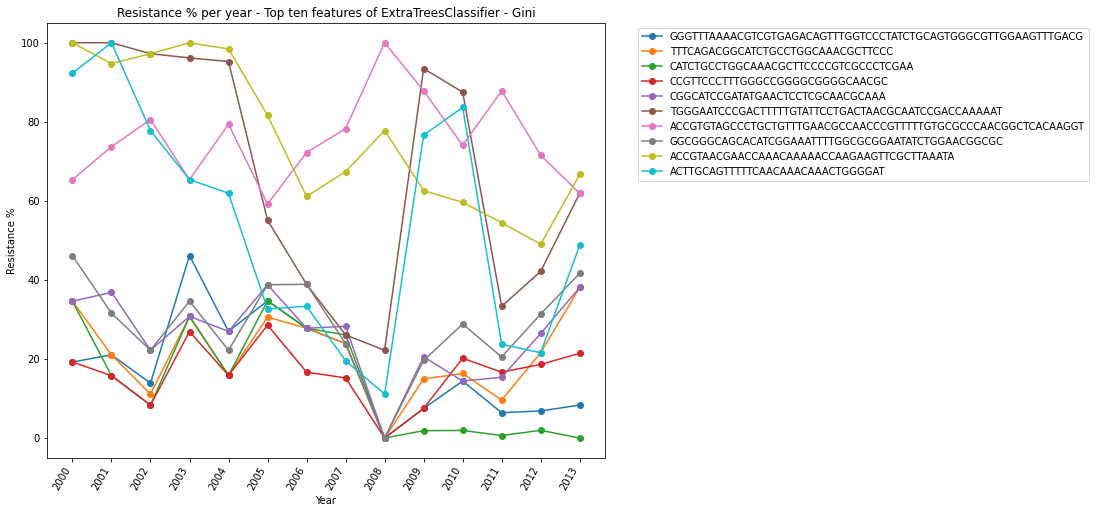

In [42]:
plot_resistance_perc_vs_year(etc_gini_important_feature, 'ExtraTreesClassifier - Gini')

top_predictors:  ['GGGTTTAAAACGTCGTGAGACAGTTTGGTCCCTATCTGCAGTGGGCGTTGGAAGTTTGACG'
 'TTTCAGACGGCATCTGCCTGGCAAACGCTTCCC'
 'CATCTGCCTGGCAAACGCTTCCCCGTCGCCCTCGAA' 'CCGTTCCCTTTGGGCCGGGGCGGGGCAACGC'
 'CGGCATCCGATATGAACTCCTCGCAACGCAAA'
 'TGGGAATCCCGACTTTTTGTATTCCTGACTAACGCAATCCGACCAAAAAT'
 'ACCGTGTAGCCCTGCTGTTTGAACGCCAACCCGTTTTTGTGCGCCCAACGGCTCACAAGGT'
 'GGCGGGCAGCACATCGGAAATTTTGGCGCGGAATATCTGGAACGGCGC'
 'ACCGTAACGAACCAAACAAAAACCAAGAAGTTCGCTTAAATA'
 'ACTTGCAGTTTTTCAACAAACAAACTGGGGAT']


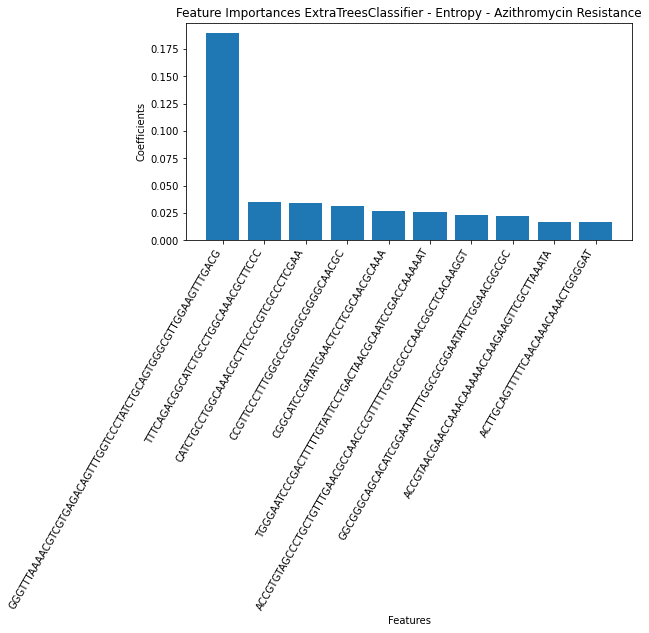

In [43]:
etc_entropy_important_feature = get_important_features_and_plot('ExtraTreesClassifier - Entropy')

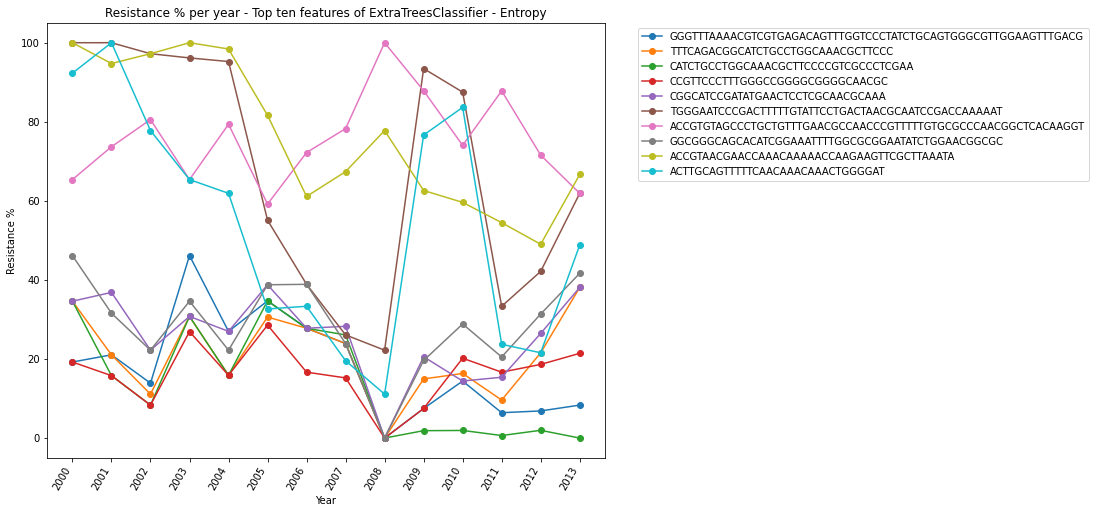

In [44]:
plot_resistance_perc_vs_year(etc_entropy_important_feature, 'ExtraTreesClassifier - Entropy')

top_predictors:  ['GGGTTTAAAACGTCGTGAGACAGTTTGGTCCCTATCTGCAGTGGGCGTTGGAAGTTTGACG'
 'CGGATATAGTGGATTAACAAAAATCAGGACA'
 'GTCGTAATCACCGCCCTGCCGACCGCCATGGCCTCCTGGG'
 'CCGGCTCAAAGGGAACGGTTTCCTAAGGTGC'
 'ATAAAGATGAGATAACGGCTTTGATTAATAGTCTTAAATAAAGGGGC'
 'AAAGGCGTTTGCGTTGCGAGGAGTTCATATC' 'TCATCTCGTATGCCGTCTTCTGCTTGAAAAA'
 'TTGCCGTTCCGCAGTTGGGCGGCAGCATACA'
 'CTGACGGATATCCGCAAAAAAACACCTATCAAAAAAGCA'
 'CTTGGATATGTCCAATCCTACAGTGTTACGCA']


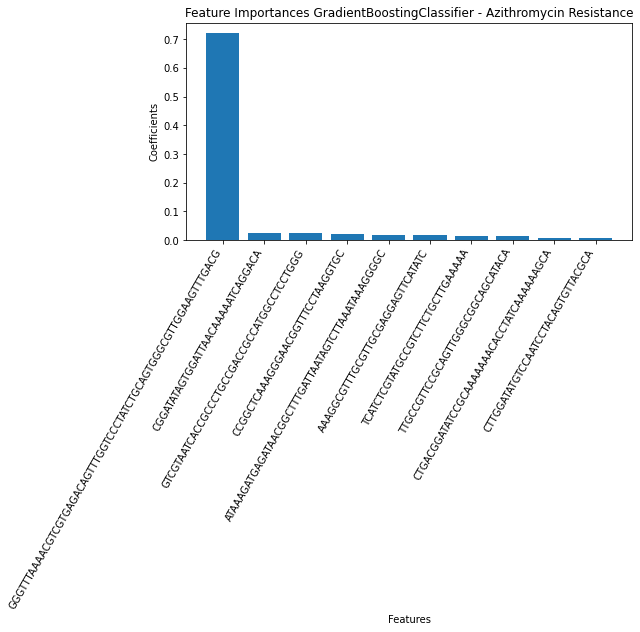

In [45]:
gbc_important_feature = get_important_features_and_plot('GradientBoostingClassifier')

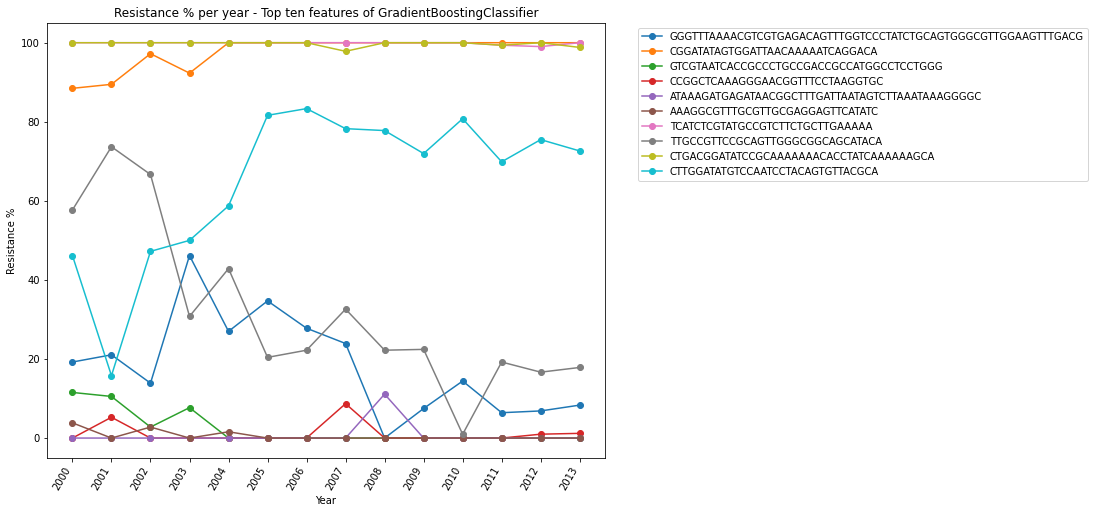

In [46]:
plot_resistance_perc_vs_year(gbc_important_feature, 'GradientBoostingClassifier')

top_predictors:  ['GGGTTTAAAACGTCGTGAGACAGTTTGGTCCCTATCTGCAGTGGGCGTTGGAAGTTTGACG'
 'CATCTGCCTGGCAAACGCTTCCCCGTCGCCCTCGAA' 'CCGTTCCCTTTGGGCCGGGGCGGGGCAACGC'
 'TTTCAGACGGCATCTGCCTGGCAAACGCTTCCC' 'AACTTTCTGAACATATTTGCCTTTGATTTCG'
 'TGGGAATCCCGACTTTTTGTATTCCTGACTAACGCAATCCGACCAAAAAT'
 'CGGCATCCGATATGAACTCCTCGCAACGCAAA' 'ACTTGCAGTTTTTCAACAAACAAACTGGGGAT'
 'ACCGTAACGAACCAAACAAAAACCAAGAAGTTCGCTTAAATA'
 'TAAAAGCAACGGTACGGTAAACGACGGCACGCTTGACGGAAACCTGTATTGG']


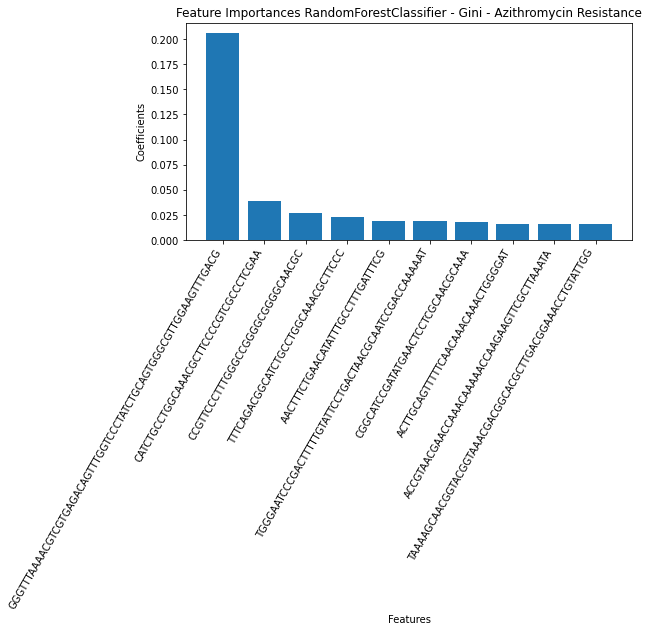

In [47]:
rfc_gini_important_feature = get_important_features_and_plot('RandomForestClassifier - Gini')

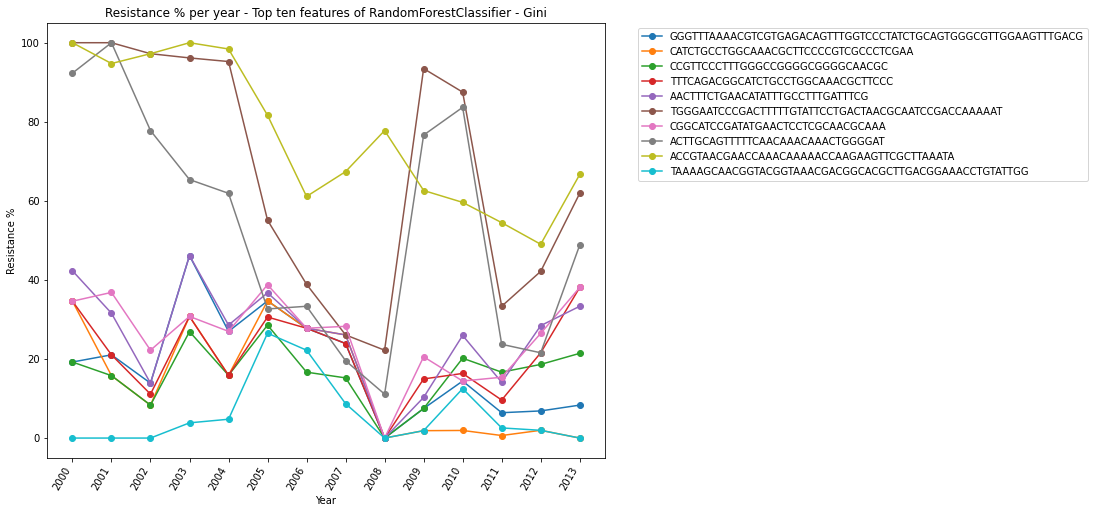

In [48]:
plot_resistance_perc_vs_year(rfc_gini_important_feature, 'RandomForestClassifier - Gini')

top_predictors:  ['GGGTTTAAAACGTCGTGAGACAGTTTGGTCCCTATCTGCAGTGGGCGTTGGAAGTTTGACG'
 'CCGTTCCCTTTGGGCCGGGGCGGGGCAACGC' 'CATCTGCCTGGCAAACGCTTCCCCGTCGCCCTCGAA'
 'ACCGTGTAGCCCTGCTGTTTGAACGCCAACCCGTTTTTGTGCGCCCAACGGCTCACAAGGT'
 'CCCAAAGGGAACGATTCCCTAAGGTGATGGA'
 'CGTTATTTGCCGCACAAGCGGCTCAAAGCCGTGCTGACCCAAG'
 'TGGGAATCCCGACTTTTTGTATTCCTGACTAACGCAATCCGACCAAAAAT'
 'CGGCATCCGATATGAACTCCTCGCAACGCAAA' 'ACTTGCAGTTTTTCAACAAACAAACTGGGGAT'
 'TTTCAGACGGCATCTGCCTGGCAAACGCTTCCC']


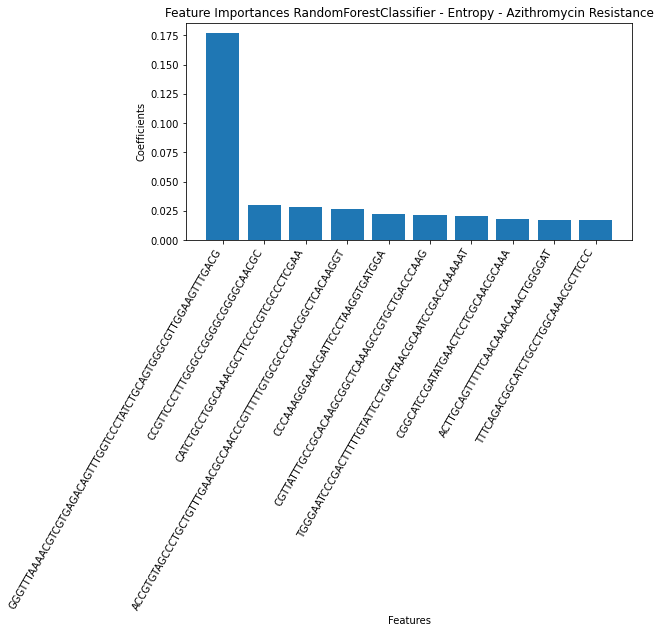

In [49]:
rfc_entropy_important_feature = get_important_features_and_plot('RandomForestClassifier - Entropy')

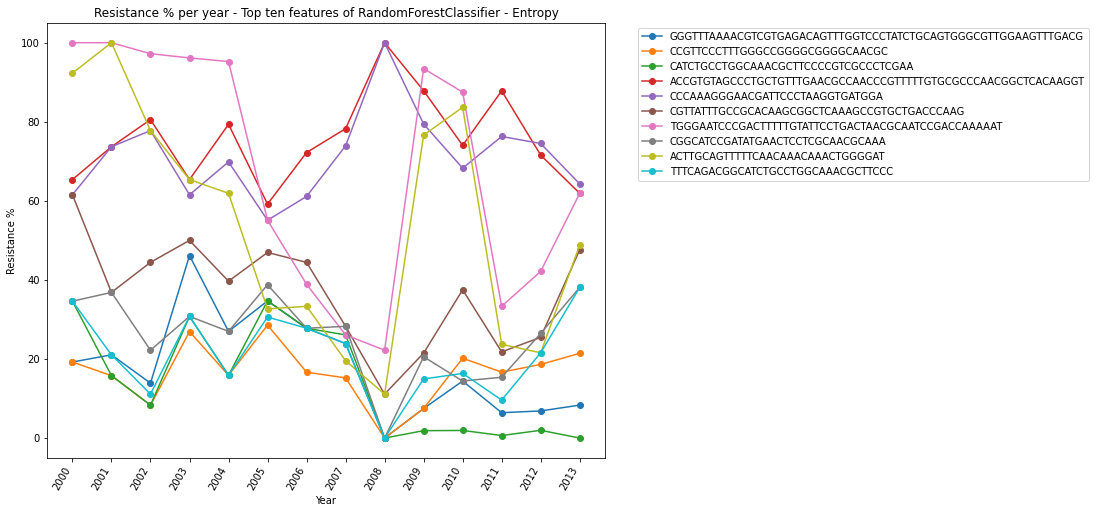

In [50]:
plot_resistance_perc_vs_year(rfc_entropy_important_feature, 'RandomForestClassifier - Entropy')

In [51]:
# print(tabulate(yr_vs_resistance_perc_df, headers=list(yr_vs_resistance_df.columns), tablefmt='grid'))
# yr_vs_resistance_perc_df
metadata_year_azm_1_perc_data_dict = {'Year': list(metadata_year_azm_1_perc_dict.keys()), 'Mutation_perc': list(metadata_year_azm_1_perc_dict.values())}
metadata_year_azm_1_perc_df = pd.DataFrame.from_dict(data=metadata_year_azm_1_perc_data_dict)
yr_vs_resistance_perc_df['Year']=yr_vs_resistance_perc_df['Year'].astype(int)
yr_vs_resistance_perc_df_copy = yr_vs_resistance_perc_df.copy()

top_10_features_dt_entropy = ['GGGTTTAAAACGTCGTGAGACAGTTTGGTCCCTATCTGCAGTGGGCGTTGGAAGTTTGACG','CGGATATAGTGGATTAACAAAAATCAGGACA','TTGCCGTTCCGCAGTTGGGCGGCAGCATACA','TTTCAGACGGCATCTGCCTGGCAAACGCTTCCC','CCGGCTCAAAGGGAACGGTTTCCTAAGGTGC','ATAAAGATGAGATAACGGCTTTGATTAATAGTCTTAAATAAAGGGGC','TGGGAATCCCGACTTTTTGTATTCCTGACTAACGCAATCCGACCAAAAAT','ACCGTAACGAACCAAACAAAAACCAAGAAGTTCGCTTAAATA','CGTAATCGGCGGCAATGCGCCGCACCCGCCTGTCGTTGTGATAGGCAACGCCTT','CGGCATCCGATATGAACTCCTCGCAACGCAAA']
yr_vs_resistance_perc_df_copy_columns = ['Year'] + top_10_features_dt_entropy
for column in list(yr_vs_resistance_perc_df_copy.columns):
    if column not in yr_vs_resistance_perc_df_copy_columns:
        yr_vs_resistance_perc_df_copy.drop(columns=[column], inplace=True)

metadata_year_azm_1_perc_df = metadata_year_azm_1_perc_df.merge(yr_vs_resistance_perc_df_copy, on='Year')
print(tabulate(metadata_year_azm_1_perc_df, headers=list(metadata_year_azm_1_perc_df.columns), tablefmt='grid'))

+----+--------+-----------------+---------------------------------------------------+-----------------------------------------------------------------+-----------------------------------+-----------------------------------+----------------------------------------------+------------------------------------------------------+-------------------------------------+------------------------------------+----------------------------------------------------------+-----------------------------------+
|    |   Year |   Mutation_perc |   ATAAAGATGAGATAACGGCTTTGATTAATAGTCTTAAATAAAGGGGC |   GGGTTTAAAACGTCGTGAGACAGTTTGGTCCCTATCTGCAGTGGGCGTTGGAAGTTTGACG |   CCGGCTCAAAGGGAACGGTTTCCTAAGGTGC |   TTGCCGTTCCGCAGTTGGGCGGCAGCATACA |   ACCGTAACGAACCAAACAAAAACCAAGAAGTTCGCTTAAATA |   TGGGAATCCCGACTTTTTGTATTCCTGACTAACGCAATCCGACCAAAAAT |   TTTCAGACGGCATCTGCCTGGCAAACGCTTCCC |   CGGCATCCGATATGAACTCCTCGCAACGCAAA |   CGTAATCGGCGGCAATGCGCCGCACCCGCCTGTCGTTGTGATAGGCAACGCCTT |   CGGATATAGTGGATTAACAAAAATCAGGACA |
+====+==

In [52]:
def predict_resistance_perc(years, gene):
    X = np.array(years)
    y = np.array(gene)
    X = X.reshape(len(X),1)
    y = y.reshape(len(y),1)
    lin_reg = LinearRegression()
    lin_reg.fit(X, y)
    year_pred = list(range(2014,2026))
    res_pred = []
    for year in year_pred:
        pred = lin_reg.predict([[year]])[0][0]
        if pred < 0:
            res_pred.append(0)
        elif pred > 100:
            res_pred.append(100)
        else:
            res_pred.append(pred)
    return res_pred

def predict_linear(X_Train, y_train, X_pred):
    X = np.array(X_Train)
    y = np.array(y_train)
    X = X.reshape(len(X),10)
    y = y.reshape(len(y),1)
    lin_reg = LinearRegression()
    lin_reg.fit(X, y)
    res_pred = []
    pred = lin_reg.predict(X_pred)
    for p in list(pred):
        if p[0] < 0:
            res_pred.append(0)
        elif p[0] > 100:
            res_pred.append(100)
        else:
            res_pred.append(p[0])
    return res_pred

predicted_mutation_dict = {}
for unittig in list(metadata_year_azm_1_perc_df.columns)[2:]:
    predicted_mutation_dict[unittig] = predict_resistance_perc(list(metadata_year_azm_1_perc_df.Year), list(metadata_year_azm_1_perc_df[unittig]))

predicted_mutation_df = pd.DataFrame.from_dict(predicted_mutation_dict)
predicted_mutation_df['Year'] = list(range(2014,2026))

predicted_mutation_df = predicted_mutation_df.reindex(columns=['Year'] + list(predicted_mutation_df.columns)[:-1] )
print(tabulate(predicted_mutation_df, headers=list(predicted_mutation_df.columns), tablefmt='grid'))
mutation_gene_df_X_pred = predicted_mutation_df.copy()
mutation_gene_df_X_pred.drop(columns=['Year'], inplace=True)

mutation_gene_df_X_train = metadata_year_azm_1_perc_df.copy()
mutation_gene_df_X_train.drop(columns=['Year', 'Mutation_perc'], inplace=True)
mutation_gene_df_y_train = metadata_year_azm_1_perc_df.Mutation_perc

predict_mutation_perc_ls = predict_linear(mutation_gene_df_X_train, mutation_gene_df_y_train, mutation_gene_df_X_pred)




+----+--------+---------------------------------------------------+-----------------------------------------------------------------+-----------------------------------+-----------------------------------+----------------------------------------------+------------------------------------------------------+-------------------------------------+------------------------------------+----------------------------------------------------------+-----------------------------------+
|    |   Year |   ATAAAGATGAGATAACGGCTTTGATTAATAGTCTTAAATAAAGGGGC |   GGGTTTAAAACGTCGTGAGACAGTTTGGTCCCTATCTGCAGTGGGCGTTGGAAGTTTGACG |   CCGGCTCAAAGGGAACGGTTTCCTAAGGTGC |   TTGCCGTTCCGCAGTTGGGCGGCAGCATACA |   ACCGTAACGAACCAAACAAAAACCAAGAAGTTCGCTTAAATA |   TGGGAATCCCGACTTTTTGTATTCCTGACTAACGCAATCCGACCAAAAAT |   TTTCAGACGGCATCTGCCTGGCAAACGCTTCCC |   CGGCATCCGATATGAACTCCTCGCAACGCAAA |   CGTAATCGGCGGCAATGCGCCGCACCCGCCTGTCGTTGTGATAGGCAACGCCTT |   CGGATATAGTGGATTAACAAAAATCAGGACA |
+====+========+=============================

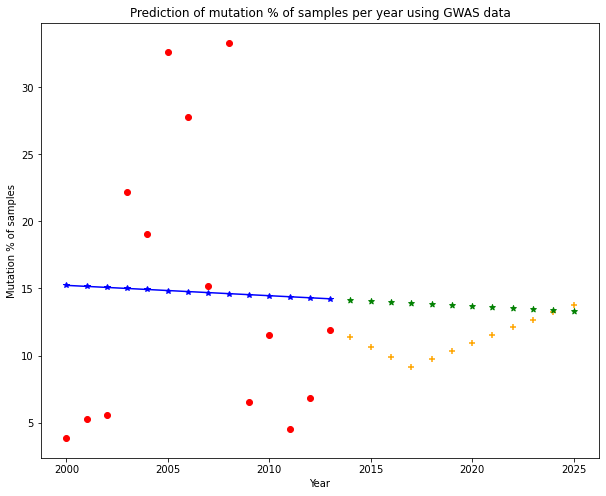

In [53]:
figure(figsize=(10, 8))
X = np.array(list(metadata_year_azm_1_perc_dict.keys()))
y = np.array(list(metadata_year_azm_1_perc_dict.values()))
X = X.reshape(len(X),1)
y = y.reshape(len(y),1)
plt.scatter(list(range(2014,2026)), predict_mutation_perc_ls, color='orange', marker='+')
plot_linear_regression(X, y, "Year", "Mutation % of samples", "Prediction of mutation % of samples per year using GWAS data")

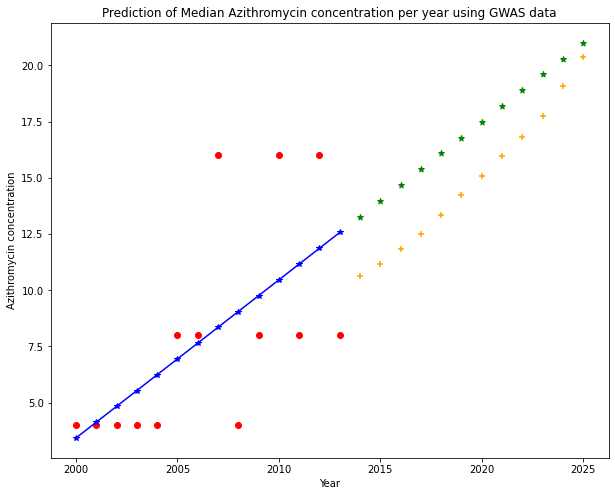

In [54]:
mutation_azm_y_train = np.array(list(metadata_med_1_dict.values()))
predicted_azm = predict_linear(mutation_gene_df_X_train, mutation_azm_y_train, mutation_gene_df_X_pred)

X = np.array(list(metadata_med_1_dict.keys()))
y = np.array(list(metadata_med_1_dict.values()))
X = X.reshape(len(X),1)
y = y.reshape(len(y),1)

figure(figsize=(10, 8))
plt.scatter(list(range(2014,2026)), predicted_azm, color='orange', marker='+')
plot_linear_regression(X, y, "Year", "Azithromycin concentration", "Prediction of Median Azithromycin concentration per year using GWAS data")


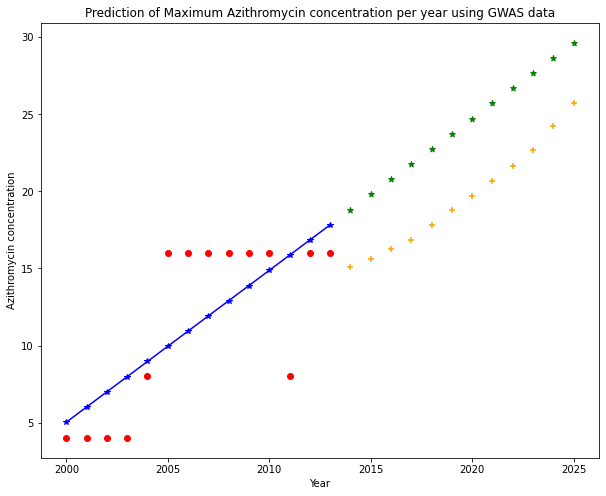

In [55]:
mutation_azm_y_train = np.array(list(metadata_max_1_dict.values()))
predicted_azm = predict_linear(mutation_gene_df_X_train, mutation_azm_y_train, mutation_gene_df_X_pred)

X = np.array(list(metadata_max_1_dict.keys()))
y = np.array(list(metadata_max_1_dict.values()))
X = X.reshape(len(X),1)
y = y.reshape(len(y),1)

figure(figsize=(10, 8))
plt.scatter(list(range(2014,2026)), predicted_azm, color='orange', marker='+')
plot_linear_regression(X, y, "Year", "Azithromycin concentration", "Prediction of Maximum Azithromycin concentration per year using GWAS data")

# Statistical Testing

# MANOVA

In [56]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.sandbox.stats.multicomp import MultiComparison

meta_gwas_data = gwas_data.copy()
meta_gwas_data = meta_gwas_data.rename(columns={'pattern_id':'Sample_ID'})
meta_gwas_data = pd.merge(metadata_df, meta_gwas_data, on='Sample_ID')

reg = ols(' azm_sr ~ CATCACCTTAGGGAATCGTTCCCTTTGGGCC + GTGTTACGCAATATATAAGGGGTTGCCGTTCC + \
                               GTTGAAAAAATCTTTAGCTACGTCAACGCGGGTAATTTTT +CTTGGATATGTCCAATCCTACAGTGTTACGCA + \
                                  CCGTTGCCGTTGCCGTCGCCGTCGCCGCTGCCG +AAGTCGGGAAATGCCCTTATCCGGTATGCGACCA + \
                                    ACCGTAACGAACCAAACAAAAACCAAGAAGTTCGCTTAAATA + GGAAGGCGTTCCCCGGAGCACCCAGGAGGCCATGGC + \
                                      ATGCGCGTCGCCTACGGACACGTCAGACACG + \
                                              AAAAACCAAGAAGTTCGCTTAAATAATATAG ', data = meta_gwas_data).fit()

In [57]:
mc = pairwise_tukeyhsd(meta_gwas_data['azm_sr'],meta_gwas_data['CATCACCTTAGGGAATCGTTCCCTTTGGGCC'], alpha=0.05)
print(mc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  -0.1451 0.001 -0.1874 -0.1029   True
---------------------------------------------------


In [58]:
mc = pairwise_tukeyhsd(meta_gwas_data['azm_sr'],meta_gwas_data['GTGTTACGCAATATATAAGGGGTTGCCGTTCC'], alpha=0.05)
print(mc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.0374 0.4147 -0.1275 0.0526  False
---------------------------------------------------


In [59]:
mc = pairwise_tukeyhsd(meta_gwas_data['azm_sr'], meta_gwas_data['GTTGAAAAAATCTTTAGCTACGTCAACGCGGGTAATTTTT'], alpha=0.05)
print(mc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  -0.1242 0.001 -0.1785 -0.0698   True
---------------------------------------------------


In [60]:
mc = pairwise_tukeyhsd(meta_gwas_data['azm_sr'],meta_gwas_data['CTTGGATATGTCCAATCCTACAGTGTTACGCA'], alpha=0.05)
print(mc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.0235 0.3232 -0.0231 0.0701  False
---------------------------------------------------


In [61]:
mc = pairwise_tukeyhsd(meta_gwas_data['azm_sr'],meta_gwas_data['AAGTCGGGAAATGCCCTTATCCGGTATGCGACCA'], alpha=0.05)
print(mc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower   upper  reject
--------------------------------------------------
     0      1  -0.1094 0.001 -0.156 -0.0629   True
--------------------------------------------------


In [62]:
mc = pairwise_tukeyhsd(meta_gwas_data['azm_sr'],meta_gwas_data['ACCGTAACGAACCAAACAAAAACCAAGAAGTTCGCTTAAATA'], alpha=0.05)
print(mc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.0297 0.2061 -0.0757 0.0163  False
---------------------------------------------------


In [63]:
mc = pairwise_tukeyhsd(meta_gwas_data['azm_sr'],meta_gwas_data['TGGGAATCCCGACTTTTTGTATTCCTGACTAACGCAATCCGACCAAAAAT'], alpha=0.05)
print(mc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.0073 0.7595 -0.0377 0.0523  False
---------------------------------------------------


In [64]:
mc = pairwise_tukeyhsd(meta_gwas_data['azm_sr'],meta_gwas_data['GGAAGGCGTTCCCCGGAGCACCCAGGAGGCCATGGC'], alpha=0.05)
print(mc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1   -0.127 0.001 -0.1696 -0.0844   True
---------------------------------------------------


In [65]:
mc = pairwise_tukeyhsd(meta_gwas_data['azm_sr'],meta_gwas_data['AAAAACCAAGAAGTTCGCTTAAATAATATAG'], alpha=0.05)
print(mc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     0      1  -0.0005   0.9 -0.0435 0.0425  False
--------------------------------------------------


In [66]:
mc = pairwise_tukeyhsd(meta_gwas_data['azm_sr'],meta_gwas_data['CCGTTGCCGTTGCCGTCGCCGTCGCCGCTGCCG'], alpha=0.05)
print(mc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1   0.1562 0.001 0.0769 0.2354   True
-------------------------------------------------
